# Assignment - Neural Networks
This assignment is for Big Data in Finance II.

# 0 Setup
Download the stock data saved on the hub as */Data/stocks_presentations/Stocks_data.csv*.

Table below presents interpretations of the variables included.

<table class="table table-bordered table-striped table-condensed">
   <tr>
      <th style = "text-align : left">Purpose</th>
      <th style = "text-align : left">Variable</th>
      <th style = "text-align : left">Description</th>
   </tr>
   <tr>
      <td style = "text-align : left" rowspan = 5>Panel </td>
   </tr>
   <tr>
      <td style = "text-align : left">GVKEY</td>
      <td style = "text-align : left">Unique Identifier</td>
   </tr>
   <tr>
      <td style = "text-align : left">tic</td>
      <td style = "text-align : left">Ticker</td>
   </tr>
   <tr>
      <td style = "text-align : left">cusip</td>
      <td style = "text-align : left">Unique Identifier</td>
   </tr>
   <tr>
      <td style = "text-align : left">conm</td>
      <td style = "text-align : left">Company name </td>
   </tr>
   <tr>
      <td style = "text-align : left" rowspan = 4>Time Series</td>
   </tr>
   <tr>
      <td style = "text-align : left">datadate</td>
      <td style = "text-align : left">Data date</td>
   </tr>
   <tr>
      <td style = "text-align : left">year</td>
      <td style = "text-align : left">Year</td>
   </tr>
   <tr>
      <td style = "text-align : left">yearmonth</td>
      <td style = "text-align : left">Year and Month</td>
   </tr>
   <tr>
      <td style = "text-align : left" rowspan = 4>Returns</td>
   </tr>
   <tr>
      <td style = "text-align : left">dvpspm</td>
      <td style = "text-align : left">Dividends per Share</td>
   </tr>
   <tr>
      <td style = "text-align : left">prccm</td>
      <td style = "text-align : left">Price - Close - Monthly</td>
   </tr>
   <tr>
      <td style = "text-align : left">trt1m</td>
      <td style = "text-align : left">Monthly Total Return</td>
   </tr>
   <tr>
      <td style = "text-align : left" rowspan = 20>Corporate Finance</td>
   </tr>
   <tr>
      <td style = "text-align : left">act</td>
      <td style = "text-align : left">Current Assets - Total</td>
   </tr>
   <tr>
      <td style = "text-align : left">at</td>
      <td style = "text-align : left">Assets - Total</td>
   </tr>
   <tr>
      <td style = "text-align : left">ch</td>
      <td style = "text-align : left">Cash</td>
   </tr>
   <tr>
      <td style = "text-align : left">dlc</td>
      <td style = "text-align : left">Debt in Current Liabilities - Total</td>
   </tr>
   <tr>
      <td style = "text-align : left">dltt</td>
      <td style = "text-align : left">Long-Term Debt - Total</td>
   </tr>
   <tr>
      <td style = "text-align : left">dvt</td>
      <td style = "text-align : left">Dividends - Total</td>
   </tr>
   <tr>
      <td style = "text-align : left">ebit</td>
      <td style = "text-align : left">Earnings Before Interest and Taxes</td>
   </tr>
   <tr>
      <td style = "text-align : left">ebitda</td>
      <td style = "text-align : left">Earnings Before Interest, Taxes, depreciation and amortization</td>
   </tr>
   <tr>
      <td style = "text-align : left">invt</td>
      <td style = "text-align : left">Inventories - Total</td>
   </tr>
   <tr>
      <td style = "text-align : left">lct</td>
      <td style = "text-align : left">Current Liabilities - Total</td>
   </tr>
   <tr>
      <td style = "text-align : left">ni</td>
      <td style = "text-align : left">Net Income (Loss)</td>
   </tr>
   <tr>
      <td style = "text-align : left">sale</td>
      <td style = "text-align : left">Sales/Turnover (Net)</td>
   </tr>
   <tr>
      <td style = "text-align : left">xrd</td>
      <td style = "text-align : left">Research and Development Expense</td>
   </tr>
   <tr>
      <td style = "text-align : left">mkvalt</td>
      <td style = "text-align : left">Market Value - Total - Fiscal</td>
   </tr>
   <tr>
      <td style = "text-align : left">R&D_to_Market_Cap</td>
      <td style = "text-align : left">xrd/mkvalt</td>
   </tr>
   <tr>
      <td style = "text-align : left">R&D_to_Sales</td>
      <td style = "text-align : left">xrd/sale</td>
   </tr>
   <tr>
      <td style = "text-align : left">NI_to_Market_Cap</td>
      <td style = "text-align : left">ni/mkvalt</td>
   </tr>
   <tr>
      <td style = "text-align : left">Operating_profitability</td>
      <td style = "text-align : left">ebit/sale</td>
   </tr>
   <tr>
      <td style = "text-align : left">Sales_to_price</td>
      <td style = "text-align : left">sale/prccm</td>
   </tr>
   
   <tr>
      <td style = "text-align : left" rowspan = 19>Macroeconomic</td>
   </tr>
   
   <tr>
       <td style = "text-align : left">Index</td>
       <td style = "text-align : left">S&amp;P 500</td>
   </tr>
   <tr>
       <td style = "text-align : left">D12</td>
       <td style = "text-align : left">Dividends </td>
   </tr>
   <tr>
       <td style = "text-align : left">E12</td>
       <td style = "text-align : left">Earnings</td>
   </tr>
   <tr>
       <td style = "text-align : left">b/m</td>
       <td style = "text-align : left">Book-to-Market Ratio</td>
   </tr>
   <tr>
       <td style = "text-align : left">tbl</td>
       <td style = "text-align : left">Treasury Bills</td>
   </tr>
   <tr>
       <td style = "text-align : left">AAA</td>
       <td style = "text-align : left">Corporate Bond Yields on AAA-rated Bonds</td>
   </tr>
   <tr>
       <td style = "text-align : left">BAA</td>
       <td style = "text-align : left">Corporate Bond Yields on BAA-rated Bonds</td>
   </tr>
   <tr>
       <td style = "text-align : left">lty</td>
       <td style = "text-align : left">Long Term Yield</td>
   </tr>
   <tr>
       <td style = "text-align : left">ntis</td>
       <td style = "text-align : left">Net Equity Expansion</td>
   </tr>
   <tr>
       <td style = "text-align : left">Rfree</td>
       <td style = "text-align : left">risk-free rate</td>
   </tr>
   <tr>
       <td style = "text-align : left">infl</td>
       <td style = "text-align : left">Inflation</td>
   </tr>
   <tr>
       <td style = "text-align : left">ltr</td>
       <td style = "text-align : left">Long Term Rate of Returns</td>
   </tr>
   <tr>
       <td style = "text-align : left">corpr</td>
       <td style = "text-align : left">Corporate Bond Returns</td>
   </tr>
   <tr>
       <td style = "text-align : left">svar</td>
       <td style = "text-align : left">Stock Variance</td>
   </tr>
   <tr>
       <td style = "text-align : left">csp</td>
       <td style = "text-align : left">Cross-Sectional Premium</td>
   </tr>
   <tr>
       <td style = "text-align : left">CRSP_SPvw</td>
       <td style = "text-align : left">S&amp;P value weighted stock returns</td>
   </tr>
   <tr>
       <td style = "text-align : left">CRSP_SPvwx</td>
       <td style = "text-align : left">S&amp;P value weighted stock returns excluding dividends</td>
   </tr>
   
</table>

The dataset is a stock-time level panel data running from 2010 to 2017.

It contains stock prices and returns, plus micro factors of corporate.

Noted that the data given is *"unbalanced"*, meaning that not all stocks are recorded in all time periods. 

First thing first, cleaning up is needed.

### 0.1 Cleaning up

In [1]:
% matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.seterr(all='ignore')
np.random.seed(123)

In [2]:
# load the data
df = pd.read_csv('C:/Users/eric_/Documents/Stuff/Uni/Imperial/Notes/Courses/Summer/Big Data 2/Assignment/2/data/Stocks_data.csv', low_memory = False, index_col=0)

# check data structure
df.shape

(191892, 45)

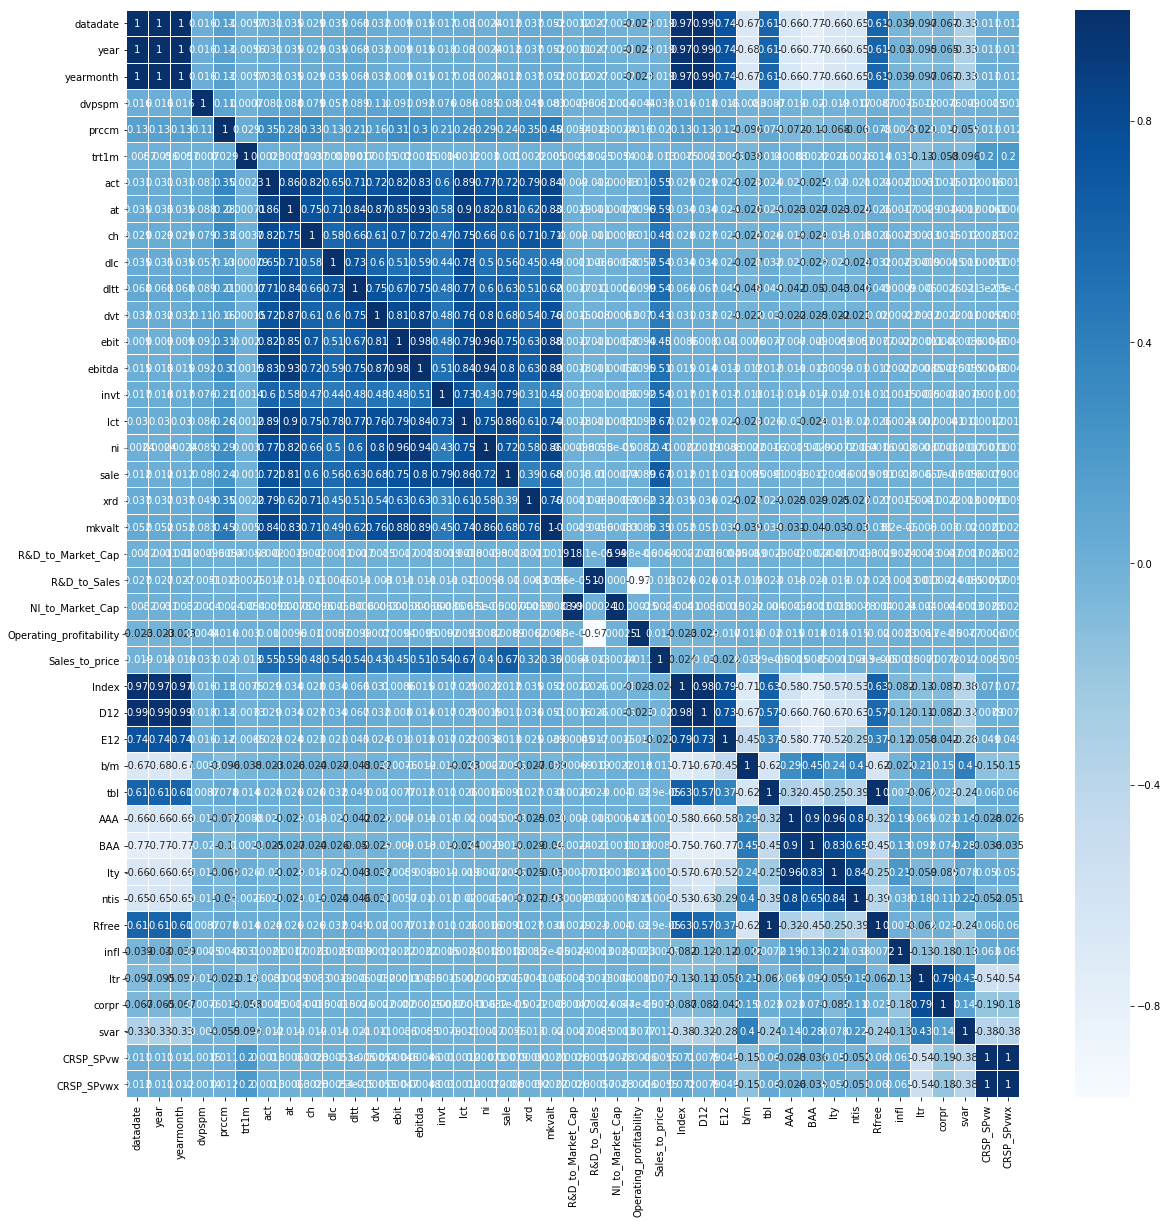

In [168]:
# heatmap to cheack correlation
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            linewidths=0.01, cmap='Blues', annot = True, ax = ax)

In [3]:
# first see if there are any NA entries
df_tmp = df.isna().sum()
df_tmp[df_tmp > 0]

prccm                           9
trt1m                         794
R&D_to_Sales                  216
Operating_profitability        58
Sales_to_price                  9
csp                        191892
dtype: int64

In [4]:
# however there are also some infinite entries, replace them with nan for easy removal
df_tmp = df.replace([np.inf, -np.inf], np.nan).isna().sum()
df_tmp[df_tmp > 0]

prccm                           9
trt1m                         794
R&D_to_Sales                 7330
Operating_profitability      7330
Sales_to_price                  9
csp                        191892
dtype: int64

In [5]:
# since there's over 190k observations, we can drop the rows without any information
# there is some missing R&D to sales ratios, operating profitabilities and trt1m
# first drop the empty csp column
df = df.drop(columns=['csp'])

# then drop any rows with NA values in predictions like R&D-sales, operating profitabilities and trt1m
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

# also remove companies with less than 3 observations
removed_companies = []

for i in range(len(df.index.value_counts())):
    if df.index.value_counts().tolist()[i] < 3:
        removed_companies.append(df.index.value_counts().index.tolist()[i])
df.drop(removed_companies, inplace=True)
df.shape

(183853, 44)

### 0.2 Splitting and Normalising

For time-series data it is important to respect the chronology of the data, so KFold is not valid as we would be training our neural network using random observations from the entire dataset, rather than based on a chronological ordering. Therefore, we sort the dataframe by date and then split into 40%, 40%, 20% chronologically.

The distribution of the dates shown below is relatively even, otherwise proceeding in this manner could be inaccurate, for example if the majority of the observations were in 2013, so that 2013 observations take up some of the training data and the majority of the validation and test datasets. 

In [6]:
df['datadate'].value_counts().head()

20101231    2015
20101130    2011
20101031    2008
20100930    2007
20100831    2002
Name: datadate, dtype: int64

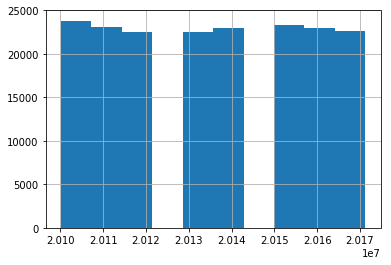

In [7]:
df['datadate'].hist()

In [8]:
# split the data into 40/40/20
sorted_df = df.sort_values(by=['datadate'])
train_df = sorted_df[0:round(0.4 * len(df))]
valid_df = sorted_df[round(0.4 * len(df)):round(0.8 * len(df))]
test_df = sorted_df[round(0.8 * len(df)):len(df)]
train_df.shape, valid_df.shape, test_df.shape

((73541, 44), (73541, 44), (36771, 44))

In [9]:
## TEST SETS
# create array of features, excluding closing stock price
a = np.array(train_df.iloc[:-1, 6]).reshape(-1, 1)
b = np.array(train_df.iloc[:-1, 9:])
X_train = np.concatenate((a, b), axis=1)  # features
# array of labels
y_train = np.array(train_df.iloc[1:, 8]).reshape(-1, 1)  # monthly returns

## VALIDATION SETS
a1 = np.array(valid_df.iloc[:-1, 6]).reshape(-1, 1)
b1 = np.array(valid_df.iloc[:-1, 9:])
X_valid = np.concatenate((a1, b1), axis=1)
y_valid = np.array(valid_df.iloc[1:, 8]).reshape(-1, 1)

## Test SETS
a2 = np.array(test_df.iloc[:-1, 6]).reshape(-1, 1)
b2 = np.array(test_df.iloc[:-1, 9:])
X_test = np.concatenate((a2, b2), axis=1)
y_test = np.array(test_df.iloc[1:, 8]).reshape(-1, 1)

In [10]:
## NORMALISE THE DATA
# function to normalise a 2d array
def normalise(X):
    X_norm = (X - X.mean(axis=1).reshape(-1, 1)) / X.std(axis=1).reshape(-1, 1)
    return X_norm


X_train = normalise(X_train)
X_valid = normalise(X_valid)
X_test = normalise(X_test)

# check
X_train, X_train.shape

(array([[-0.54138874,  2.086162  ,  2.95624019, ..., -0.54138401,
         -0.54147354, -0.54147599],
        [-0.14633685,  0.10103067,  0.10183139, ..., -0.14632784,
         -0.14649858, -0.14650324],
        [-0.45756549,  0.95398842,  3.45013609, ..., -0.45761477,
         -0.45762081, -0.45762098],
        ...,
        [-0.39931867,  0.18291585,  3.22998231, ..., -0.3993611 ,
         -0.39935182, -0.39935221],
        [-0.37620736,  0.77493083,  1.71327544, ..., -0.37620678,
         -0.37616179, -0.37616368],
        [-0.203332  ,  0.28962276,  0.35625935, ..., -0.20333014,
         -0.20318828, -0.20319425]]), (73540, 36))

# 1 Understanding the data

Start with a LASSO regression  of one-month ahead stock returns on the firm-level and macroeconomic variables, tune the hyperparameter using the validation set.

Which variables are important? Are those the variables you expected?

Are there other asset classes and sample periods for which you would/would not expect those relationships to hold?

### 1.1 Preset
First, define functions to analysis results of LASSO.

In [90]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import numpy as np
import time

# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4

# build model
def build_models(x, y):
    alpha_range = np.linspace(0, 0.0005, 50)

    model = Lasso(normalize=True)
    coeffiecients = []
    # fit model for each alpha
    for alpha in alpha_range:
        model.set_params(alpha=alpha)
        model.fit(x, y)
        coeffiecients.append(model.coef_)
    # print coeffiecients
    coeff_path(alpha_range, coeffiecients)


# view coef
def view_model(model):
    print("model coefficients")
    print("======================")
    for i, coef in enumerate(model.coef_):
        print("coefficient %d %0.3f" % (i + 1, coef))
    print("intercept : %0.3f\n" % (model.intercept_))


# evaluate model
def model_worth(true_y, predicted_y):
    print ("mean squared error = %0.2f\n" % (mean_squared_error(true_y,predicted_y)) )
    print ("R squared = %0.4f\n" % r_squared(true_y, predicted_y))

# plot coef with alpha
def coeff_path(alpha_range, coeffiecients):
    plt.close('all')
    plt.cla()
    plt.figure(1)
    plt.xlabel("Alpha")
    plt.ylabel("coeffiecient weights for different alpha values")
    plt.plot(alpha_range, coeffiecients)
    plt.axis('tight')
    plt.show()

# get coef
def get_coef(x, y, alpha):
    model = Lasso(normalize=True, alpha=alpha)
    model.fit(x, y)
    coefs = model.coef_
    indices = [i for i, coef in enumerate(coefs) if abs(coef) > 0.0]
    return indices

# plot ic criterion
def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=0.5,label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')
    
# R2
def r_squared(true,pred):
    n=len(true)
    numerator_sum=0
    denominator_sum=0
    for i in range(n):
        numerator_sum=numerator_sum+(true[i]-pred[i])**2
        denominator_sum=denominator_sum+(true[i]-true.mean())**2
    rsq=1-((1/n)*numerator_sum)/((1/n)*denominator_sum)
    return rsq
    # model.score(x,y) # we could use model.score directly

In [157]:
# data ready for train
x, y = X_train, y_train.reshape(-1)
x.shape, y.shape

((73540, 36), (73540,))

### 1.2 Lasso Model Selection : AIC / BIC / CV
Information-criterion based model selection is very fast, but it relies on a proper estimation of degrees of freedom, are derived for large samples (asymptotic results) and assume the model is correct, i.e. that the data are actually generated by this model. They also tend to break when the problem is badly conditioned (more features than samples). 

Here we use the Akaike information criterion (AIC), the Bayes Information criterion (BIC) and cross-validation (CV) to select an optimal value of the regularization parameter alpha of the Lasso estimator.

From case study of [scikit-learn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html),
we could easily pick the best type of Lasso Model based on the graph of Information-Criterion. Besides, we could output the graph of MSE according with the alpha we select. Two graphs below show the example of diabetes prediction.
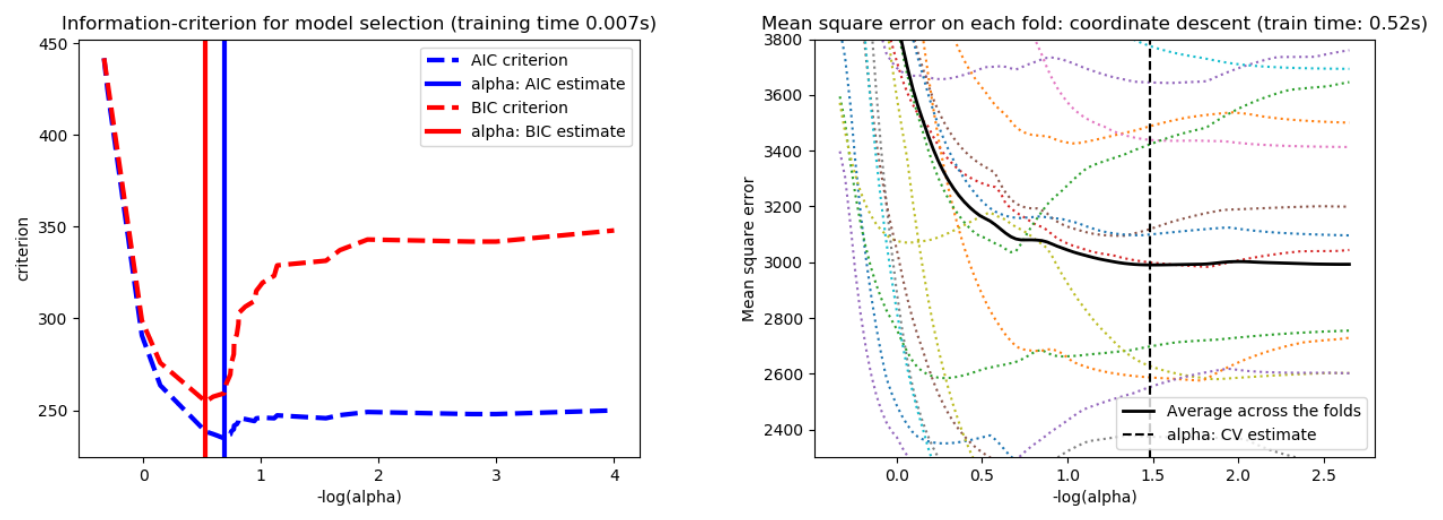


best alpha for AIC and BIC
 1.5218470466665188e-07 1.5218470466665188e-07


Text(0.5,1,'Information-Criterion for Model Selection (training time 0.163s)')

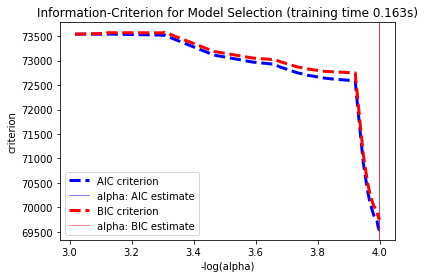

In [151]:
# LassoLarsIC: least angle regression with BIC/AIC criterion
model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(x, y)
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(x, y)
alpha_aic_ = model_aic.alpha_

print( 'best alpha for AIC and BIC\n', alpha_aic_, alpha_bic_)

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-Criterion for Model Selection (training time %.3fs)'% t_bic)

Computing regularization path using the coordinate descent lasso...


(100, 500)

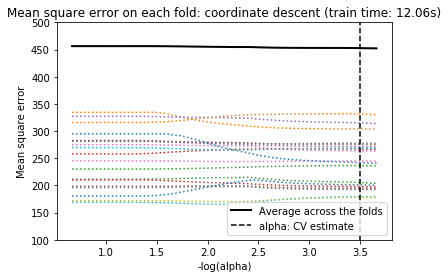

In [109]:
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=20).fit(x, y)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas,model.mse_path_.mean(axis=-1),'k',label='Average across the folds',linewidth=2)
plt.axvline(-np.log10(model.alpha_+ EPSILON),linestyle='--',color='k',label='alpha: CV estimate')

plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent (train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')

ymin, ymax = 100,500
plt.ylim(ymin, ymax)


We could observe that Information-Crriterion would jump sharply when crossing a typical alpha. MSE won't change much according to the change of alpha. There are some exceptions folds which have super high MSE. So we could not select type of Lasso using this method.

### 1.3 Variables Selection
Since we can not get useful information from method above, let's focus on side of the variables reductions. We know that if the higher the penalty level we set, the less the number of variables we leave in our model. We could focus on several highly important variables and build a simple Lasso model to predict and explain.

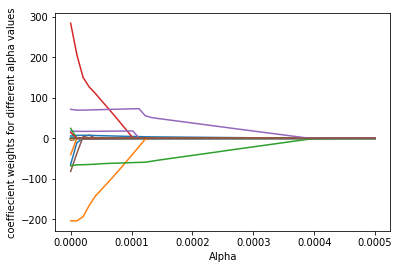


predicting using all the variables

mean squared error = 428.64

R squared = 0.06



In [34]:
build_models(x, y)

print("\npredicting using all the variables\n")
full_model = LinearRegression(normalize=True)
full_model.fit(x, y)
predicted_y = full_model.predict(x)
model_worth(y, predicted_y)


In [158]:
print("\nmodels at different alpha values\n")
# alpa_values = [0.22, 0.08, 0.01]
alpa_values = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
rsq = []
for alpha in alpa_values:
    indices = get_coef(x, y, alpha)
    print("alpha = %0.4f\nnumber of variables selected = %d" % (alpha, len(indices)))  # check coef
    print("attributes include: ", indices)  # check index
    print("attributes names: ", np.array(list(train_df))[indices] )  # check index
    x_new = x[:, indices]
    model = LinearRegression(normalize=True)
    model.fit(x_new, y)
    predicted_y = model.predict(x_new)
    model_worth(y, predicted_y)
    rsq.append(r_squared(y,predicted_y))
    view_model(model)


models at different alpha values

alpha = 0.0001
number of variables selected = 17
attributes include:  [4, 7, 9, 10, 12, 13, 14, 17, 19, 20, 21, 22, 23, 24, 30, 34, 35]
attributes names:  ['year' 'prccm' 'act' 'at' 'dlc' 'dltt' 'dvt' 'invt' 'ni' 'sale' 'xrd'
 'mkvalt' 'R&D_to_Market_Cap' 'R&D_to_Sales' 'E12' 'BAA' 'lty']
mean squared error = 429.59

R squared = 0.0548

model coeffiecients
coefficient 1 0.300
coefficient 2 -0.544
coefficient 3 -0.763
coefficient 4 -0.956
coefficient 5 -0.178
coefficient 6 -1.220
coefficient 7 -0.074
coefficient 8 1.272
coefficient 9 -0.287
coefficient 10 1.469
coefficient 11 22.558
coefficient 12 -42.190
coefficient 13 1505.454
coefficient 14 -57371.976
coefficient 15 27706.630
coefficient 16 12249.521
coefficient 17 15924.523
intercept : 0.540

alpha = 0.0002
number of variables selected = 10
attributes include:  [9, 10, 12, 13, 17, 19, 20, 22, 34, 35]
attributes names:  ['act' 'at' 'dlc' 'dltt' 'invt' 'ni' 'sale' 'mkvalt' 'BAA' 'lty']
mean squared e

Text(0.5,0,'alpha')

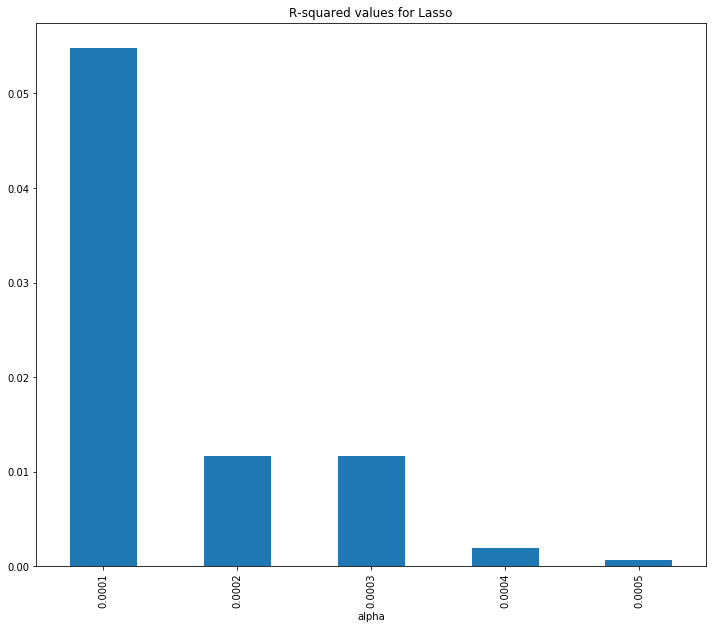

In [160]:
rsq = pd.DataFrame(rsq)
rsq.index= alpa_values
rsq.plot(kind='bar',title='R-squared values for Lasso',legend=False,figsize=(12,10))
plt.xlabel("alpha")

mean squared error = 389.81

R squared = 0.0004



(0, 5)

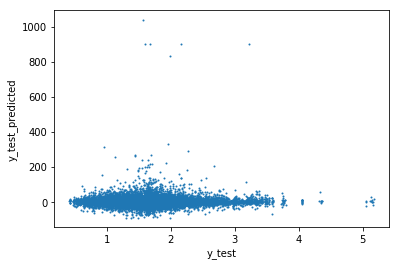

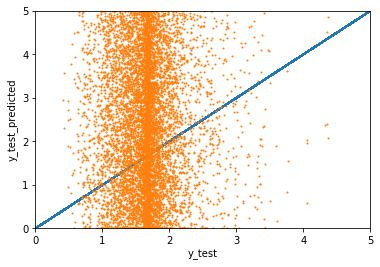

In [145]:
alpha = 0.0004 # the alpha we pick
indices = get_coef(x, y, alpha)
x_new = x[:, indices]
model = LinearRegression(normalize=True)
model.fit(x_new, y)

# data ready for test
x, y = X_test, y_test.reshape(-1)
x_new = x[:, indices]

predicted_y = model.predict(x_new)
model_worth(y, predicted_y)

plt.figure()
plt.plot(predicted_y, y, 'o',markersize = 1)
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")


plt.figure()
plt.plot(y,y)
plt.plot(predicted_y, y, 'o',markersize = 1)
plt.xlabel("y_test")
plt.ylabel("y_test_predicted")
plt.xlim(0, 5)
plt.ylim(0, 5)

In [144]:
y_test

array([[ -0.665 ],
       [ -1.6243],
       [-19.0355],
       ...,
       [-11.9829],
       [  3.3545],
       [  2.9215]])

['act' 'at' 'dlc' 'ni' 'sale' 'mkvalt'] are the important variables we get.

We find that with the increasing of penalty, more and more Macroeconomic factors are kicked off. Finally, only micro factors for Corporate remain.

Asset, debt, income, sale and market value are all key indicators of one company's financial status. They should have a good predictability and interpretation for stock returns.

However, for the Lasso Regression, we couldn't get well predictions in the end. We get R2 = 0.0004. Thus let's move on to the next part, using Neural Networks to learning.

# 2 Training neural networks

Train a neural network to predict one-month ahead returns. Using the validation set, tune the model by modifiying the architecture, and regularisation procedures. Regularisation will be important here because you do not have a huge dataset.

Follow geometric pyramid rule from Masters (1993) for hidden layers and number of neurons. Run many different specifications.

Which model performs best OOS?

Compare to second best model.

Compare to LASSO.

Which variables are important and how do they differ from LASSO model? Give economic interpretation.

#### Variables

We have chosen to closing stock price (prccm) but kept dividends per share, in line with Goyal and Welch's choice to use the dividend per price ratio as a predictor of stock returns, which showed good results both in-sample, and out-of-sample (but poor performance over past 30 years). This means we have a total of 36 features, and we will attempt to predict "trt1m" one-month ahead, the stock level monthly total return.

#### Network architecture

Following the geometric pyramid rule, given $m$ input nodes and $n$ output nodes, we should use $\sqrt{m\cdot n}$ hidden units, for one hidden layer.

In general, for number of hidden layers, $l$, the geometric ratio from layer to layer is $r=\sqrt[l+1]{\frac{n}{m}}$, and we have rounded to the nearest integer where necessary.

- The number of layers, $l$, we will use are $l=\{1,2,3,4,5\}$
- Therefore, the number of hidden units is $n^{(j)}=\{6, (11,3), (15,6,2), (18,9,4,2), (20,11,6,3,2)\}$, with 36 and 1 always serving as the number of input and output units respectively.

We will use the rectified linear unit (relu) for the activation function, with a linear output layer.

#### Network regularisation

Usually, only one hidden layer is enough, and the larger amount of hidden layers is likely to lead to overfitting, especially with as little as data as we have. We will use the **L1 penalty, early stopping and batch normalization** for regularisation procedures, but if there is no great improvement in results moving from 2 to 3 hidden layers, we will try L2 and dropout.

#### Network optimisation

For optimisation procedures, we will utilise **Adam** - adaptive movement estimation, which combines momentum (taking weighted average of previous steps, smoothing gradient) and RMSProp which avoids oscillations in direction of previously large steps. We will use the coefficients for the Adam procedure provided in the original research paper and may alter depending on the learning curve.

#### Keras

We will be using the Keras API within the TensorFlow environment in order to train and validate the neural networks as scikit-learn is not the most suitable environment for larger neural networks, with no GPU support.

## 2.1 Producing learning curves

The general procedure we have decided to take to tackle this supervision problem is an iterative one, suggested by the Deep Learning book:

+ Determine your goals
    - Error metric to use: MAE/MSE, with later focus on MSE for optimisation performance
+ Establish a working end-to-end pipeline as soon as possible, estimation of performance metrics
    - This is why in the later sections we will be evaluating performance with $R^2$ before regularising and optimising, so that the framework is already there to compare to the baseline model
+ Diagnose whether poor performance is due to over or underfitting or a defect in data or software
    - This is the purpose of section 2.1 and producing learning curves, to be able to distinguish whether our models are over or underfitting, and then react accordingly and apply the necessary optimisation and regularisations from a toolbox, since each tool has its specific purpose
+ Repeatedly make incremental changes such as gathering new data, tuning hyperparameters or changing algorithms, based on specific findings from the previous step
    - This step is implemented in section 2.4, where we apply the different optimisation and regularisation techniques based on the outcome of our learning curves

Producing learning curves is important in being able to diagnose whether our preliminary neural networks are underfitting or overfitting, which we can then tune hyperparameters and use different optimisation and regularisation techniques.

After we have identified the factors contributing to over and underfitting we can then predict monthly stock returns on the test set using the validated model.

In [11]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import set_random_seed
set_random_seed(123)

print(tf.__version__) # ensure it was imported correctly

1.13.1


In [12]:
# first define functions which are our five different neural networks
# these will be the geometrically sequenced layers described above

def NN1():
    # first we build the architecture, 36, 6, 1 for 1 hidden layer
    model = keras.Sequential([
        layers.Dense(36, activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dense(6, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    # adam optimiser with learning rate 0.001 at first, can change this if poor learning curve
    optimiser = tf.keras.optimizers.Adam(0.001)
    
    # compile the model, using mean squared error loss and adam optimzer
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

def NN2():
    # first we build the architecture, 36, 11, 3, 1 for 2 layers
    model = keras.Sequential([
        layers.Dense(36, activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dense(11, activation=tf.nn.relu),
        layers.Dense(3, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    # adam optimiser with learning rate 0.001 at first, can change this if poor learning curve
    optimiser = tf.keras.optimizers.Adam(0.001)
    
    # compile the model, using mean squared error loss and adam optimzer
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

def NN3():
    # first we build the architecture, 36, 6, 1 for 1 hidden layer
    model = keras.Sequential([
        layers.Dense(36, activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dense(15, activation=tf.nn.relu),
        layers.Dense(6, activation=tf.nn.relu),
        layers.Dense(2, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    # adam optimiser with learning rate 0.001 at first, can change this if poor learning curve
    optimiser = tf.keras.optimizers.Adam(0.001)
    
    # compile the model, using mean squared error loss and adam optimzer
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

def NN4():
    # first we build the architecture, 36, 6, 1 for 1 hidden layer
    model = keras.Sequential([
        layers.Dense(36, activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dense(18, activation=tf.nn.relu),
        layers.Dense(9, activation=tf.nn.relu),
        layers.Dense(4, activation=tf.nn.relu),
        layers.Dense(2, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    # adam optimiser with learning rate 0.001 at first, can change this if poor learning curve
    optimiser = tf.keras.optimizers.Adam(0.001)
    
    # compile the model, using mean squared error loss and adam optimzer
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

def NN5():
    # first we build the architecture, 36, 6, 1 for 1 hidden layer
    model = keras.Sequential([
        layers.Dense(36, activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dense(20, activation=tf.nn.relu),
        layers.Dense(11, activation=tf.nn.relu),
        layers.Dense(6, activation=tf.nn.relu),
        layers.Dense(3, activation=tf.nn.relu),
        layers.Dense(2, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    # adam optimiser with learning rate 0.001 at first, can change this if poor learning curve
    optimiser = tf.keras.optimizers.Adam(0.001)
    
    # compile the model, using mean squared error loss and adam optimzer
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [13]:
model1=NN1()
model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36)                1332      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 222       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [23]:
# begin training the model by feeding it the observations

# first ensure the model has sensible outputs

testing=model1.predict(X_train[:10])
testing

array([[0.19364166],
       [0.160953  ],
       [0.32606143],
       [0.45303038],
       [0.26040056],
       [0.31463075],
       [0.35999948],
       [0.5150047 ],
       [0.3811589 ],
       [0.24489334]], dtype=float32)

In [20]:
X_test.shape

(36770, 36)

In [ ]:
# now train for a large number of epochs
# then we can visualise it and change the number of epochs, implementing early stopping

# will print a . at the end of each epoch, uses less space, ensures we know the code is still running
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

# the default batch size is 32 # i.e. mini-batch gradient descent with batch size 32
results_1layer = model1.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[PrintDot()]
                )
# 1 hour computation time, consider lower epochs depending on learning curve

In [25]:
results_1layer_df = pd.DataFrame(results_1layer.history)
results_1layer_df['epoch'] = results_1layer.epoch # match the epoch to each row
results_1layer_df.tail() # show final entries of the table

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,440.245747,10.071954,440.245331,478.352860,10.300407,478.352844,995
996,445.335511,10.089867,445.335358,480.980338,10.322057,480.980255,996
997,439.613052,10.097539,439.613007,472.411712,10.197361,472.412079,997
998,441.888666,10.114385,441.889099,476.306712,10.251218,476.306976,998
999,439.887079,10.055422,439.886902,481.776010,10.323063,481.775909,999


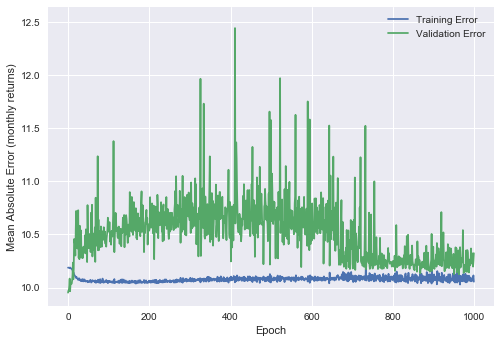

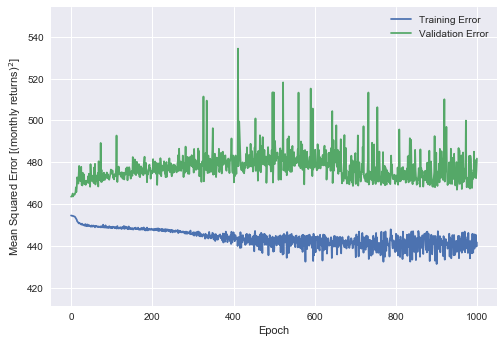

In [26]:
# Create a function that will be able to plot the results from future neural networks

def plot_learning_curves(model):
  results = pd.DataFrame(model.history)
  results['epoch'] = model.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error (monthly returns)')
  plt.plot(results['epoch'], results['mean_absolute_error'],
           label='Training Error')
  plt.plot(results['epoch'], results['val_mean_absolute_error'],
           label = 'Validation Error')
  plt.ylim([results.mean_absolute_error.min()-0.2,results.val_mean_absolute_error.max()+0.2])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error [(monthly returns)$^2$]')
  plt.plot(results['epoch'], results['mean_squared_error'],
           label='Training Error')
  plt.plot(results['epoch'], results['val_mean_squared_error'],
           label = 'Validation Error')
  plt.ylim([(results.mean_squared_error.min()-20),results.val_mean_squared_error.max()+20]) # limit the axes to max values
  plt.legend()
  plt.show()

plot_learning_curves(results_1layer)

## 2.2 Analysis of learning curves
Before we move on to diagnosing our neural network and trying out different optimisations and regularisations based on the suggestions of the learning curve, we can use the initial values and architecture here as our "baseline" model, and see if our improvements to optimisation and regularisation actually have any effect on the test error. Prior to testing our "baseline" models, we can rule out certain things that we were going to test, based on these results.

The first thing we can do straight way, **is eliminate the testing of neural networks with hidden layers $4$ and $5$**, because our **learning curves show that there is a severe case of overfitting**, and many literature cite that 3 hidden layers has more than enough capacity for most prediction tasks, especially considering the relatively low number of observations in our data. We can tell the overfitting from our learning curve from a few observations. First, let's zoom in on different epochs to see if we can pinpoint where the overfitting occurs.

In [175]:
# Zooming in on different epochs to analyse the curves

def plot_learning_curves_20epochs(model):
  results = pd.DataFrame(model.history)
  results['epoch'] = model.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error (monthly returns)')
  plt.plot(results['epoch'][0:20], results['mean_absolute_error'][0:20],
           label='Training Error')
  plt.plot(results['epoch'][0:20], results['val_mean_absolute_error'][0:20],
           label = 'Validation Error')
  plt.ylim([results['mean_absolute_error'][0:20].min()-0.2,results['val_mean_absolute_error'][0:20].max()+0.2])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error [(monthly returns)$^2$]')
  plt.plot(results['epoch'][0:20], results['mean_squared_error'][0:20],
           label='Training Error')
  plt.plot(results['epoch'][0:20], results['val_mean_squared_error'][0:20],
           label = 'Validation Error')
  plt.ylim([(results['mean_squared_error'][0:20].min()-5),(results['val_mean_squared_error'][0:20].max()+5)]) # limit the axes to max values
  plt.legend()
  plt.show()

def plot_learning_curves_100epochs(model):
  results = pd.DataFrame(model.history)
  results['epoch'] = model.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error (monthly returns)')
  plt.plot(results['epoch'][0:100], results['mean_absolute_error'][0:100],
           label='Training Error')
  plt.plot(results['epoch'][0:100], results['val_mean_absolute_error'][0:100],
           label = 'Validation Error')
  plt.ylim([results['mean_absolute_error'][0:100].min()-0.2,results['val_mean_absolute_error'][0:100].max()+0.2])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error [(monthly returns)$^2$]')
  plt.plot(results['epoch'][0:100], results['mean_squared_error'][0:100],
           label='Training Error')
  plt.plot(results['epoch'][0:100], results['val_mean_squared_error'][0:100],
           label = 'Validation Error')
  plt.ylim([(results['mean_squared_error'][0:100].min()-5),(results['val_mean_squared_error'][0:100].max()+5)]) # limit the axes to max values
  plt.legend()
  plt.show()

def plot_learning_curves_500epochs(model):
  results = pd.DataFrame(model.history)
  results['epoch'] = model.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error (monthly returns)')
  plt.plot(results['epoch'][0:500], results['mean_absolute_error'][0:500],
           label='Training Error')
  plt.plot(results['epoch'][0:500], results['val_mean_absolute_error'][0:500],
           label = 'Validation Error')
  plt.ylim([results.mean_absolute_error.min()-0.2,results.val_mean_absolute_error.max()+0.2])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error [(monthly returns)$^2$]')
  plt.plot(results['epoch'][0:500], results['mean_squared_error'][0:500],
           label='Training Error')
  plt.plot(results['epoch'][0:500], results['val_mean_squared_error'][0:500],
           label = 'Validation Error')
  plt.ylim([(results.mean_squared_error.min()-20),results.val_mean_squared_error.max()+20]) # limit the axes to max values
  plt.legend()
  plt.show()

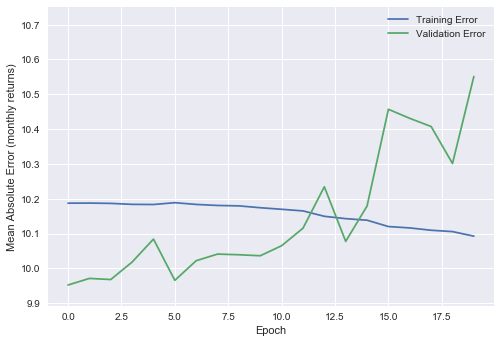

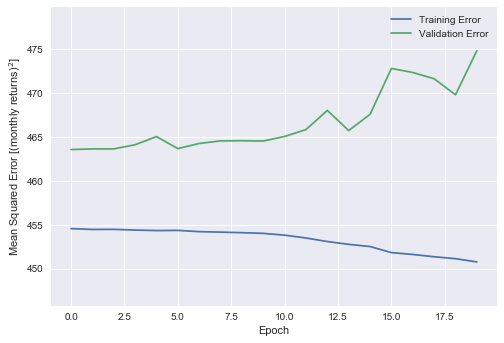

In [28]:
# zoom in on 20 epochs
plot_learning_curves_20epochs(results_1layer)

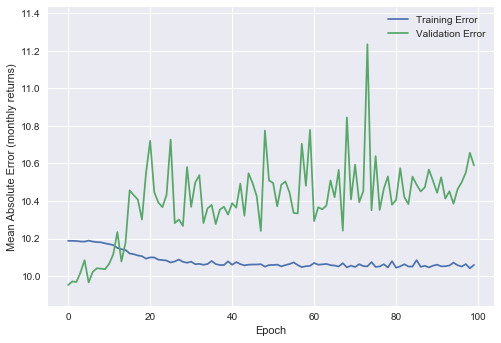

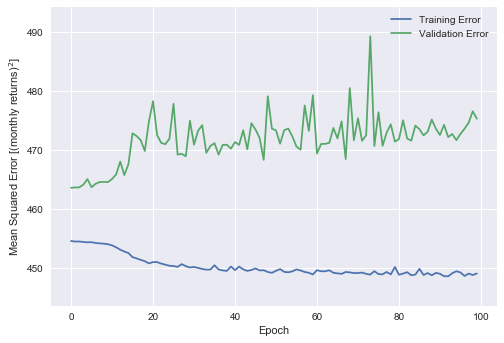

In [29]:
# zoom in on 100 epochs
plot_learning_curves_100epochs(results_1layer)

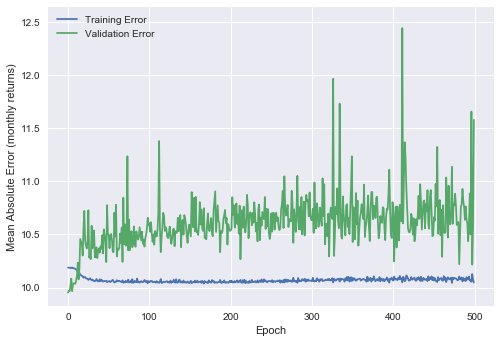

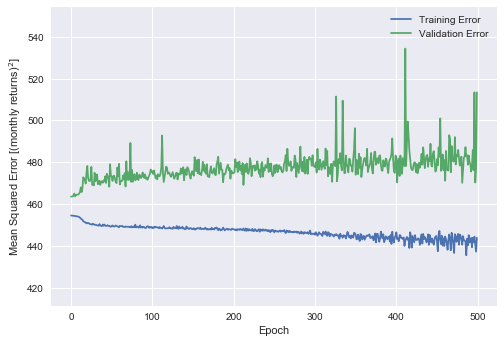

In [30]:
# zoom in on 500 epochs
plot_learning_curves_500epochs(results_1layer)

We want our model to have predictive power out of sample, on data it hasn't seen. Therefore, it should be able to be generalised, rather than fitting tightly to the training data and having poor translation to other data sets, i.e. we want to reduce the variance to a reasonable level. However, we also do not want a high bias, so we want to avoid underfitting our model.

The observations pointing towards the overfitting of our one layer baseline model and its high capacity are:

+ **The training error drops (across 20 epochs) and then slowly falls**
    - This is especially in the case of the mean squared error. The training error dropping in 10 epochs indicates that the model was able to fit the training data very well, so the fact it was training on the data for another 980 epochs, with slowly decreasing MSE until it plateaus (with noise), is a characteristic of an overfit model
    - We can see this decrease effect continue until around 400 epochs where the noise increases and the training loss begins to plateau, which could be smoothed by better optimisation such as decaying the learning rate so that the local minima is not "jumped over" during the descent process, or changing the mini-batch size

+ **The validation error is markedly different from the training error, and rises from the very first epochs**
    - For a well fit model, the validation error should drop, and then plateau, joining with the training error curve - this would indicate that even though the model was not trained on the validation set, it still obtained a similar, good level of accuracy so that the model has good generalisation power, and has a good level of accuracy (equal to that of the training data, which the model will fit well, as neural networks have high complexity, they should learn the training data to a very high accuracy)
    - However, in these curves, even zooming in on the first few epochs, we see a noisy validation error, and looking at the learning curve for 500 epochs, the validation curve is constantly rising, suggesting it is being overfit
    - If the validation curve rises, after being at a minimum, it suggests it has already been fit as well as it can (at the minimum) and thus at any further epochs, the model is being overfit, and the training process should be stopped
    - However, it is difficult to identify a local minima, so we must be cautious and bear in mind that the validation set may simply not be similar to the training set and drawn from different distributions - in other words the chronology has had a noticeable effect on the training process. If this continues after applying optimisation and regularisation techniques (the latter designed to prevent overfitting), then nested cross-validation should be considered to improve validation accuracy while respecting chronology
    
Nevertheless, for now, we can conclude that **the one layer, baseline neural network has overfit the data, and so we can consider discarding the training of neural networks with hidden layers $4$ and $5$** (where baseline model refers to no tweaking of the optimisation or regularisation procedures, only Adam ($\alpha=0.001$) and `batch_size=32`). However, as NN1 was not regularised, overfitting is bound to occur, and it does not guarantee that just because NN1-unregularised was overfit, that NN4 and NN5 will produce worse results, so we will later train them and check their predictive performance.

## 2.3 Making predictions with our baseline models
### 2.3.1 Training the remaining NN2 and NN3 models

In [31]:
model2=NN2()
model2.summary()

model3=NN3()
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 36)                1332      
_________________________________________________________________
dense_4 (Dense)              (None, 11)                407       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4         
Total params: 1,779
Trainable params: 1,779
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 36)                1332      
_________________________________________________________________
dense_8 

In [ ]:
# first train baseline model #2

# the default batch size is 32 # i.e. mini-batch gradient descent with batch size 32
results_2layer = model2.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[PrintDot()]
                )

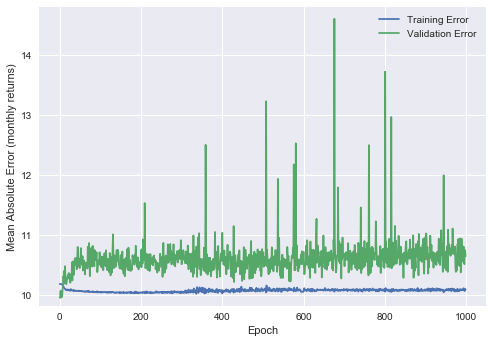

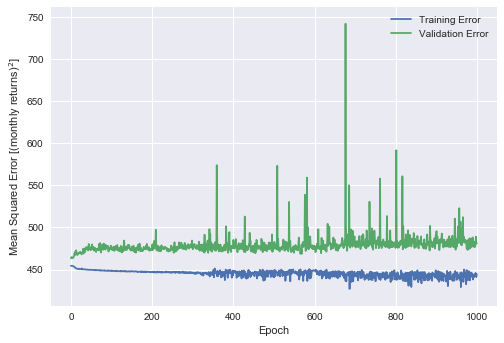

In [34]:
plot_learning_curves(results_2layer)

In [ ]:
# then baseline mode #3

# the default batch size is 32 # i.e. mini-batch gradient descent with batch size 32
results_3layer = model3.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[PrintDot()]
                )

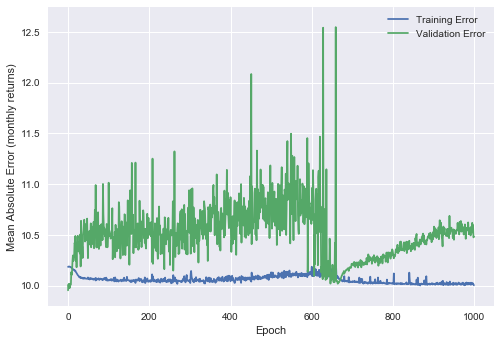

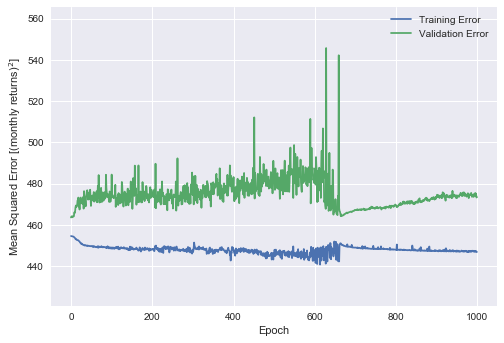

In [35]:
plot_learning_curves(results_3layer)

In the results for 2 and 3 layers we see two recurring themes. The first is the **spiking validation curve which can be a feature of mini-batch descent**. Considering the volatility of the market, it is possible that the batches of 32 that are used in the optimisation process (the descent to find the minimum) are markedly different than the next 32, so many of these spikes could be smoothed by increasing the batch size. 

These unusually large spikes in the MAE and MSE are only for a few of the epochs out of the 1000; in general the validation curve is flat for 2 layers (after an initial rise), and rises from the beginning for 3 models suggesting an overfit. There is an interesting point around 650 epochs in which the training loss stabilises again but at a higher point, likely pointing to issues with the learning rate being too high, which we will come to in the next section. There is also quite a stable rise in the validation error at this point with little noise after, meaning it could be the local minimum.

We also see a noisy training error as the epochs continue, as we will try later, a decaying learning rate may improve these learning curves. All in all, these preliminary baseline models are promising first results.

#### EarlyStopping
Again, before we even begin the optimisation and regularisation of our improved (not baseline) models, we can deduce that we should probably try to include early stopping considering how quickly our validation error rose; however because our validation curves are so noisy, we would need a high `patience` parameter (as a downward "spike" that reduces the validation error by a lot may be hard to beat) so for now we won't use the `EarlyStopping` callback, which will stop the training if a set amount of epochs passes without improvement in validation error. First we will make predictions from these models, and then add early stopping when our learning curves are looking more stable.

### $R^2$ graphs

Let's now make predictions with our (pretty poor, but expected) baseline models.

In [69]:
def r_squared(true,pred):
    n=len(true)
    numerator_sum=0
    denominator_sum=0
    for i in range(n):
        numerator_sum=numerator_sum+(true[i]-pred[i])**2
        denominator_sum=denominator_sum+(true[i]-true.mean())**2
    rsq=1-((1/n)*numerator_sum)/((1/n)*denominator_sum)
    return rsq[0]

In [55]:
model1.predict(X_test), model2.predict(X_test), model3.predict(X_test)

(array([[2.4136302],
        [2.4136302],
        [2.4136302],
        ...,
        [2.4136302],
        [2.4136302],
        [2.4136302]], dtype=float32), array([[ 3.3225284],
        [-1.2674727],
        [ 3.1519022],
        ...,
        [ 6.3437333],
        [ 6.722236 ],
        [ 6.6827607]], dtype=float32), array([[3.009416],
        [2.803692],
        [2.277597],
        ...,
        [4.915808],
        [4.915808],
        [4.915808]], dtype=float32))

From quick inspection we can see that for 1 layer, our network is predicting the same value for all `X_test`, and there are some repeat values in the 3 layer model. Nevertheless, let's calculate $R^2$ values, and we can improve the model after and see if there's any increase in the $R^2$ values.

In [71]:
pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

rsq_baseline1=r_squared(y_test,pred) # -0.106947703137214205
rsq_baseline2=r_squared(y_test,pred2) # -0.09217139536436969
rsq_baseline3=r_squared(y_test,pred3) # -0.024225346410720716

We see that actually, the neural network with 3 hidden layers actually has the highest $R^2$ value by a considerable margin, from $-9\%$ to $-2.4\%$, which tempts to take a detour to try the 4 NN and 5 NN models, after previously thinking it might not be necessary considering the overfitting of NN1 (which was not regularised). 

#### Learning of NN4 and NN5

In [76]:
model4=NN4()
model4.summary()

model5=NN5()
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 36)                1332      
_________________________________________________________________
dense_13 (Dense)             (None, 18)                666       
_________________________________________________________________
dense_14 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 3         
Total params: 2,222
Trainable params: 2,222
Non-trainable params: 0
_________________________________________________________________
________


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

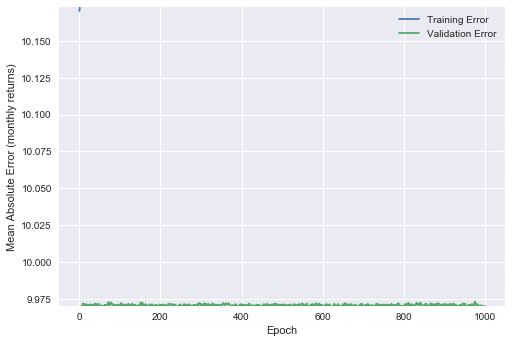

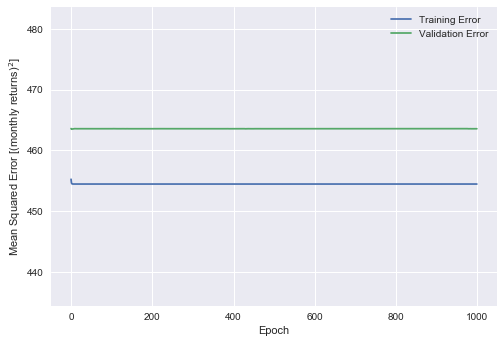

In [77]:
results_4layer = model4.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[PrintDot()]
                )

plot_learning_curves(results_4layer)

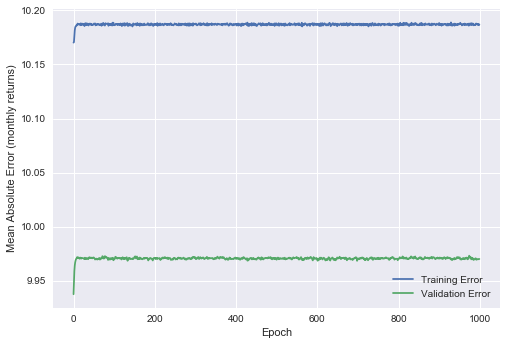

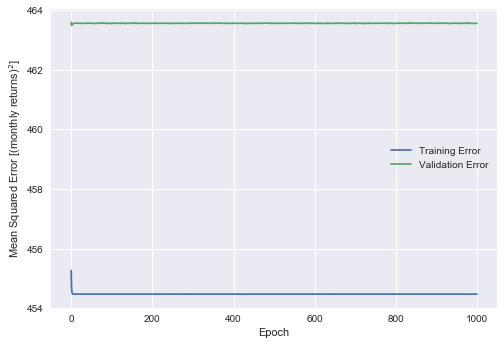

-0.0004959720880219898

In [127]:
# replot the graphs

def plot_learning_curves2(model):
  results = pd.DataFrame(model.history)
  results['epoch'] = model.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error (monthly returns)')
  plt.plot(results['epoch'], results['mean_absolute_error'],
           label='Training Error')
  plt.plot(results['epoch'], results['val_mean_absolute_error'],
           label = 'Validation Error')
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error [(monthly returns)$^2$]')
  plt.plot(results['epoch'], results['mean_squared_error'],
           label='Training Error')
  plt.plot(results['epoch'], results['val_mean_squared_error'],
           label = 'Validation Error')
  plt.legend()
  plt.show()

plot_learning_curves2(results_4layer)

pred4=model4.predict(X_test)

rsq_baseline4=r_squared(y_test,pred4) # -0.0004959720880219898
rsq_baseline4

There is severe overfitting, although the losses appear to have dropped slightly.

There is a reversal of validation curve and training curves for MAE, which is less punishing on outliers. This points to the validation set being easier for the model to predict than the training set which it has already seen, which is possible if they are very different, the chronology issue appears to be showing up again, which we made note of previously. The **$R^2$ does increase to -$0.04\%$**, a vast improvement from $-2.4\%$, so we may revisit NN4 and NN5 after improving NN1, especially with early stopping. Let us quickly calculate the $R^2$ value for NN5.


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

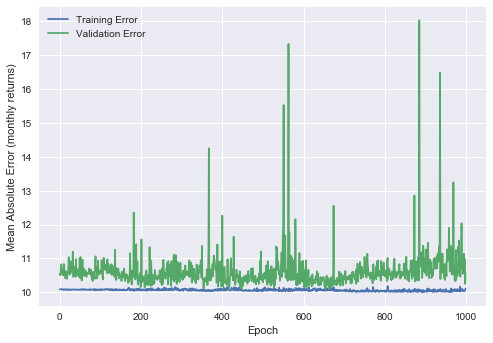

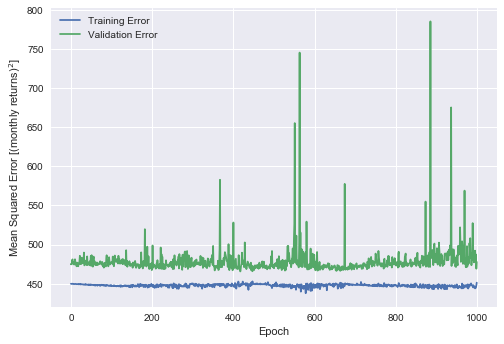

-0.14299831021843445

In [170]:
results_5layer = model5.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[PrintDot()]
                )

plot_learning_curves2(results_5layer)

pred5=model5.predict(X_test)

rsq_baseline5=r_squared(y_test,pred5) # 14299831021843445
rsq_baseline5

NN5 (baseline model) actually has the worst out of sample performance and weakest generalisation power. We can see the results below, and now start the optimisation and regularisation process to improve the results.

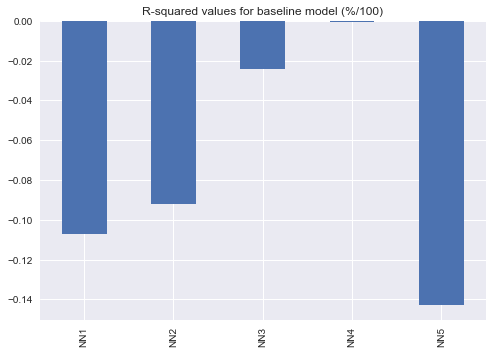

In [371]:
baseline_results=pd.DataFrame([rsq_baseline1,rsq_baseline2,rsq_baseline3,rsq_baseline4,rsq_baseline5])
baseline_results.index=['NN1','NN2','NN3','NN4','NN5']
baseline_results.plot(kind='bar',title='R-squared values for baseline model (%/100)',legend=False)

## 2.4 Optimisation and regularisation

As our first neural network model (36,6,1) already showed signs of overfitting, **we will first work on applying optimisation and regularisation techniques on model NN1**. Depending on results, we will then optimse and regularise NN2 and NN3, and compare final results to the baseline model. We will focus on cleaning up the MSE graph, the key difference between MAE and MSE being that MSE punishes outliers more than MAE.

Here is the MSE graph for NN1, for 100 epochs and 500 epochs:

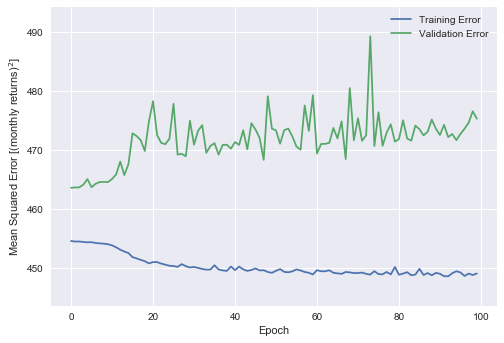

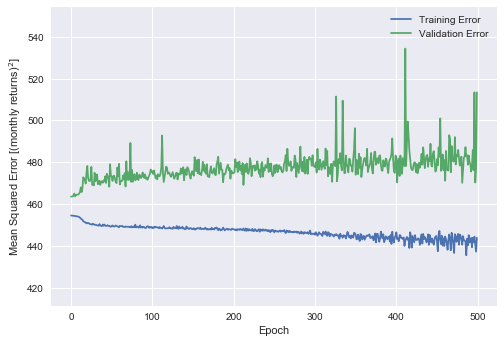

Earlier we identified that these graphs show that the one layer model (NN1) overfits quite heavily, so regularisation will be important here. However, first we should focus on optimising the procedure, and eliminating garbage, which there appears to be a lot of, especially towards the latter end of the learning curve, and for the majority of the validation curve. We should bear in mind that we are unlikely to get perfect validation curves due to the chronology of the data, and as mentioned in the improvements section, nested cross-validation remains an option, time permitting, although the issue with nested cross-validation being that we split our sets into even smaller ones, and we already have a relatively small dataset for neural networks.

An important preface is that our dataset is relatively small, which makes regularisation especially more important.

### 2.4.1 Optimisation

### 2.4.1.1 Application of methods

The first thing we notice is the noise in our learning curves. Our current optimiser is the Adam optimiser, with a batch size of 32 and a learning rate of 0.001. 

#### Learning rate

Looking at the learning curve for 500 epochs, it appears the learning process is relatively smooth until the higher epochs, so applying a **decaying learning rate** may help produce a better learning curve:

$$
\alpha_{new}=\alpha_{old}\frac{1}{1+decay\cdot iteration}
$$

i.e. every iteration (batch), the learning rate will update according to the above equation.

In [105]:
def NN1_lr():
    model = keras.Sequential([
        layers.Dense(36, activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dense(6, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    # add the decay term
    optimiser = tf.keras.optimizers.Adam(lr=0.001,decay=0.00005)
    
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [ ]:
model1_lr=NN1_lr()
results_1layer_lr = model1_lr.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[PrintDot()]
                )

plot_learning_curves(results_1layer_lr)

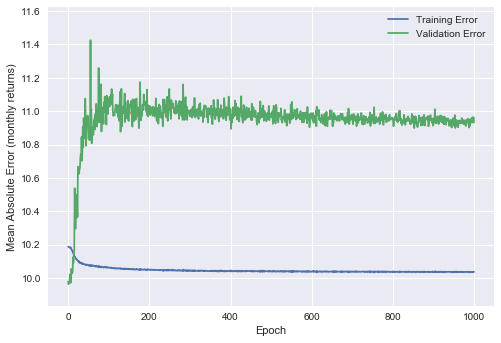

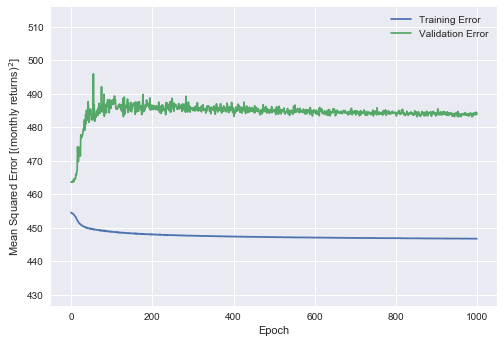

The results below are the baseline model, a decay rate of 0.00001, 0.00005 and 0.0001 respectively, for the first 100 epochs.

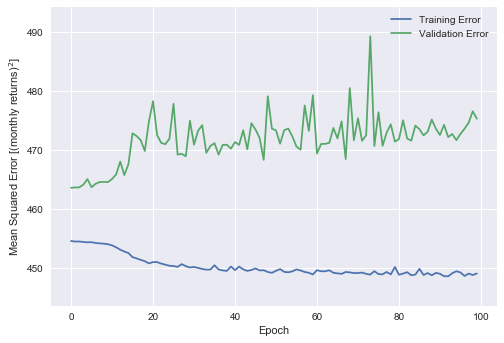

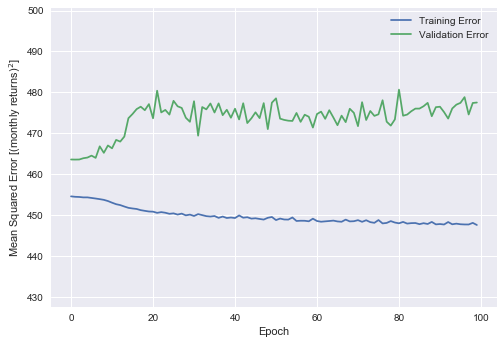

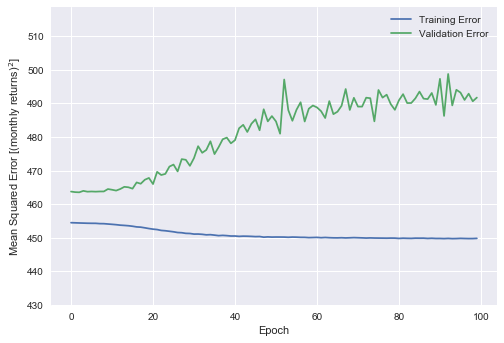

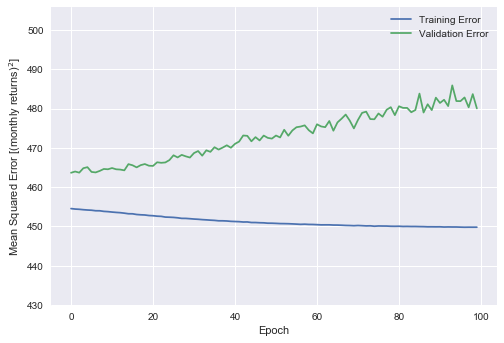

We can instantly notice that adding the decaying learning rate (which decays each batch, not epoch) smoothes both the training curve _and_ the validation curve, improving our optimisation process and making it easier for us to determine how the learning process is going without the large spikes. 

It is clear that for a decay rate of 0.0001, the curves are smoothed greatly within the first 100 epochs, and considering the converging process was more difficult around the 500 epoch mark, and the decay is stronger with each iteration, this decay rate might be too harsh, and so we will try a decay rate of **0.0005 for 1000 epochs**, in order to see if it smoothed the training process where there was difficulty converging to the local minima. This is shown below:

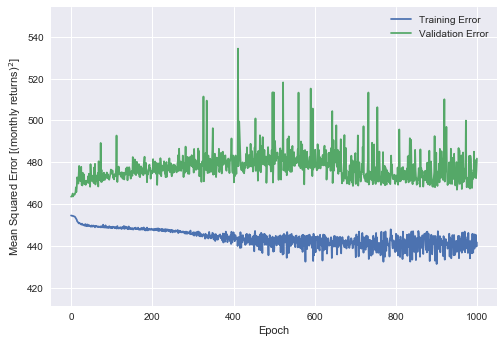

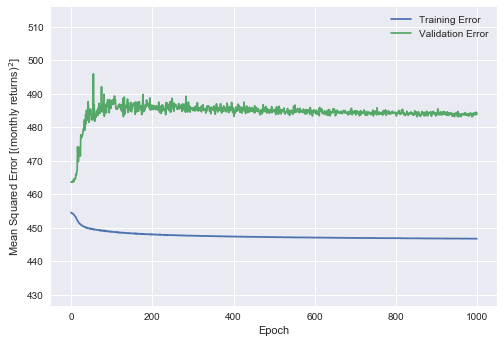

Firstly, we can see that the validation error noise has been eliminated. The side-effects have been to slightly push up, both, the validation error and the training error slightly, i.e. the actual results are slightly worse (the scales are slightly different but we can compare the levels of each by inspection). This decay rate may be slightly too strong, and so the other favourable option of 0.00001 may be tested for 1000 epochs after seeing the effect of batch size. We should note that we still see the overfitting, with the validation error rising instantly in the first few epochs, and little improvement in the training curve after 400 epochs.


#### Batch size

Now that we've smoothed out the training curve towards the end of the learning process where the minima was being missed, we can further alleviate the sharp validation spikes by changing the batch size. A larger mini-batch size will reduce the variance, as in each iteration the average over a larger number of training data will result in smoother gradient changes. Common batch sizes are in multiples of 32, so we will try 64, 128 and 256 to see if the large spikes have been tamed.

In [112]:
def NN1_lrbatch():
    model = keras.Sequential([
        layers.Dense(36, activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dense(6, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    # add the decay term
    optimiser = tf.keras.optimizers.Adam(lr=0.001)
    
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_absolute_error', 'mean_squared_error'])
    return model


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

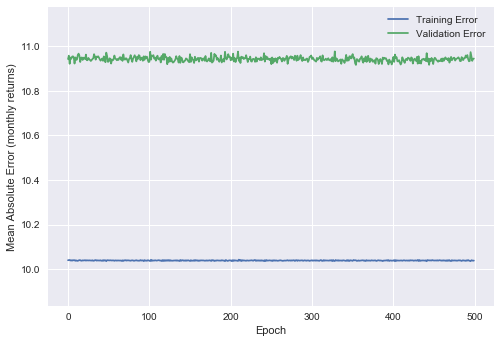

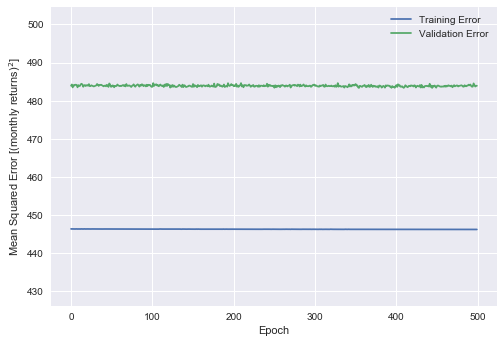

In [116]:
model1_lrbatch=NN1_lr()
results_1layer_lrbatch = model1_lr.fit(
                X_train, y_train,
                epochs=500, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[PrintDot()], batch_size=64
                )

plot_learning_curves(results_1layer_lrbatch)

It is quite clear that even without the decaying learning rate, the increase in the batch size kills any reduction in the learning curves and flattens them out. **32 remains a reasonable batch size**.

#### SGD with momentum

Since the beginning, we have been using the Adam optimiser. However, according to a recent paper (Wilson et. al 2017 - *The Marginal Value of Adaptive Gradient Methods in Machine Learning*), it may be the case that **SGD with momentum**, even though it is the predecessor to Adam, may actually be better at **generalising**, even though the Adam solutions may have an improved training loss. Considering throughout this process we have struggled with the validation curve converging to the training curve (which is what we are looking for), we should try changing the optimiser and see if our 1 layer model shows improvement, specifically in the validation curve department. If the noise returns, we can reapply the decaying learning rate, given that seemed to improve learning process.

In [167]:
def NN1_sgdmomentum():
    model = keras.Sequential([
        layers.Dense(36, activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dense(6, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    # add the decay term
    optimiser = tf.keras.optimizers.SGD(lr=0.1, momentum=0.9)
    
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_absolute_error','mean_squared_error'])
    return model


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

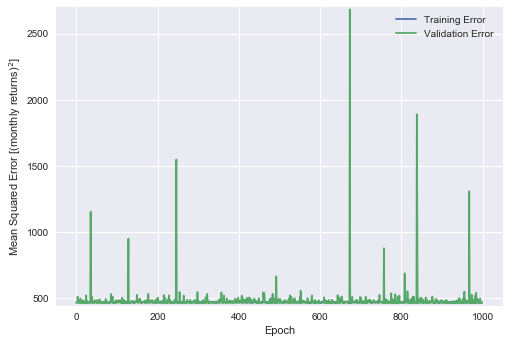

In [168]:
model1_sgdmomentum=NN1_sgdmomentum()
results_1layer_sgdmomentum = model1_sgdmomentum.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[PrintDot()], batch_size=32
                )

plot_learning_curves_mse(results_1layer_sgdmomentum)

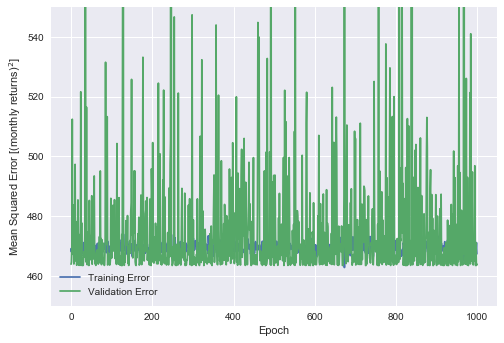

In [181]:
# one for just MSE when optimising

def plot_learning_curves_mse(model):
  results = pd.DataFrame(model.history)
  results['epoch'] = model.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error [(monthly returns)$^2$]')
  plt.plot(results['epoch'], results['mean_squared_error'],
           label='Training Error')
  plt.plot(results['epoch'], results['val_mean_squared_error'],
           label = 'Validation Error')
  plt.ylim([450,550])
  plt.legend()
  plt.show()

plot_learning_curves_mse(results_1layer_sgdmomentum)

So for the **SGD momentum graph with learning rate 0.1, above**, the training curve is hidden behind the validation curve, so again we see the validation error (with more noise than ever before) having some results that are better than the training dataset, a recurring theme throughout our results hinting at the chronological difference between the two sets.

So the takeaways from applying SGD momentum, is it initially looked promising when upping the learning rate to 0.1, with a momentum of 0.9, as seen in the first 30 epochs:

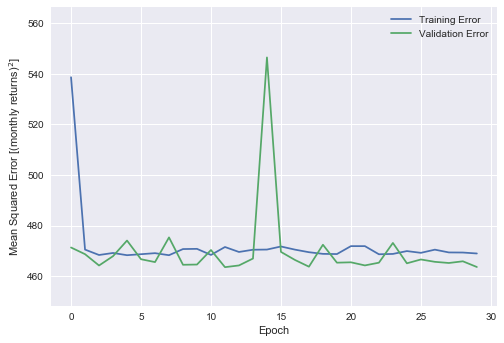

where we say promising as in it did have the intended effect of reducing the validation error, being able to better generalise our model (which we will see improves on the result of the baseline model), although the noise is much stronger in the validation error, which is expected as Adam will learn faster if the jumps are greater, and slower if the jumps are smaller, smoothing out more spikes than in SGD. The above graph prompted us to increase the learning rate, but perhaps we should tone it down and add a decay factor too to control the noise we can see in the 1000 epochs graph, which we have done below.

In [220]:
def NN1_sgdmomentumlr():
    model = keras.Sequential([
        layers.Dense(36, activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dense(6, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    # add the decay term
    optimiser = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9,decay=1e-5)
    
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_absolute_error','mean_squared_error'])
    return model

In [ ]:
model1_sgdmomentumlr=NN1_sgdmomentumlr()
results_1layer_sgdmomentumlr = model1_sgdmomentumlr.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[PrintDot()], batch_size=32
                )

In [239]:
def plot_learning_curves_mse_noYlim(model):
  results = pd.DataFrame(model.history)
  results['epoch'] = model.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error [(monthly returns)$^2$]')
  plt.plot(results['epoch'], results['mean_squared_error'],
           label='Training Error')
  plt.plot(results['epoch'], results['val_mean_squared_error'],
           label = 'Validation Error')
  plt.legend()
  plt.show()


In [ ]:
plot_learning_curves_mse_noYlim(results_1layer_sgdmomentumlr)

### 2.4.1.2 Optimisation predictions

Now that we have some different optimisations on our NN1 model, let's see which performed the best out of sample.

In [197]:
# LR, decay rate - (0.001, 0.00005)

predlr1=model1_lr.predict(X_test)
rsq_predlr1=r_squared(y_test,predlr1) # -0.07695540022296865
rsq_predlr1

-0.07695540022296865

In [215]:
model1_lrbatch

# LR 0.001

predbatch1=model1_lrbatch.predict(X_test)
rsq_predbatch1=r_squared(y_test,predbatch1) # -0.07695540022296865
rsq_predbatch1

-0.004279503328810552

In [199]:
# SGD with LR 0.1, momentum 0.9

predsgdmomentum=model1_sgdmomentum.predict(X_test)

rsq_sgdmomentum=r_squared(y_test,predsgdmomentum) # -0.0047143161224534325
rsq_sgdmomentum

# -0.0047143161224534325 with lr = 0.1

-0.0047143161224534325

In [214]:
# SGD with LR 0.01, momentum 0.9, decay 1e-5

predsgdmomentumlr1=model1_sgdmomentumlr.predict(X_test)

rsq_sgdmomentumlr1=r_squared(y_test,predsgdmomentumlr1) # -0.00015912017230768072
rsq_sgdmomentumlr1

# -0.00015912017230768072 without early stopping, lr = 0.01
## i.e. after seeing the spikes for sgdmomentum, decided to lower lr and add decay
 

# -0.00008361828361747037 with early stopping

nan

,R-squared (%/100)
Baseline NN1,-0.106948
Adam Decay,-0.076955
SGDmom,-0.004714
SGDmom_Decay,-0.000159


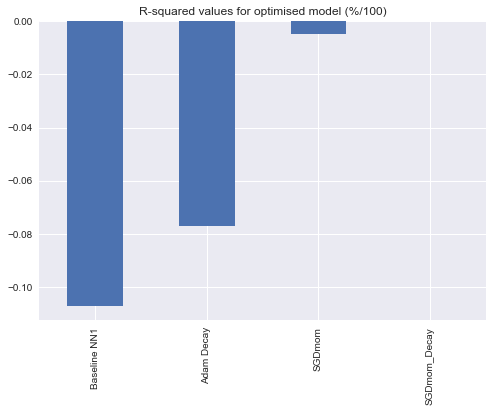

In [323]:
optimise_results=pd.DataFrame([rsq_baseline1,rsq_predlr1,rsq_sgdmomentum,-0.00015912017230768072])
optimise_results.index=['Baseline NN1','Adam Decay','SGDmom','SGDmom_Decay']
optimise_results.plot(kind='bar',title='R-squared values for optimised model (%/100)',legend=False)
optimise_results.columns=['R-squared (%/100)']
optimise_results

#### Conclusion from optimisation

The main part of this section is to get a feel for some of the parameters and the effects they have on our learning curves, and the out of sample performance.

Optimising our model improved the out of sample performance of model NN1, with **SGD momentum with learning rate decay** providing the biggest improvement in results (learning rate 0.01, decay rate 0.00001). According to the paper referenced earlier, SGD with momentum can lead to better out of sample performance, even if the in-sample performance is worsened. Given that throughout this process so far we have had troubles with generalising our model, with the validation curve often being far above the training curve with no real convergence - SGD with momentum has helped bridge the performance, although the cost has been large amount of validation error noise.

### 2.4.2 Regularisation
### 2.4.2.1 Application of methods

#### Early stopping

Now that we have optimised our neural net, we can regularise it to prevent overfitting. The first way we will do this is to include early stopping, which we briefly described earlier. We will use a patience parameter of 40, given the noisiness of our validation curves, in order to ensure an actual minima has been found rather than an outlier spike.

The optimisation methods we will continue forward for NN1 are Adam (with `lr=0.001` and decay rate `0.00005`) and SGD momentum (with `lr=0.01`, `momentum=0.9` and `decay_rate=1e-5`).


.........................................

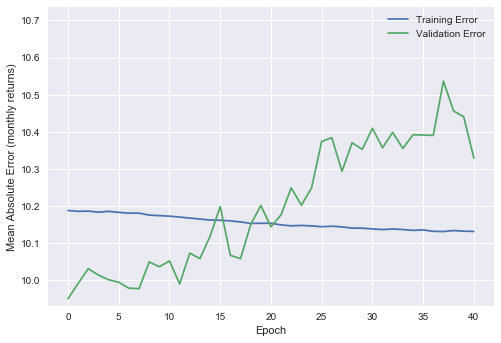

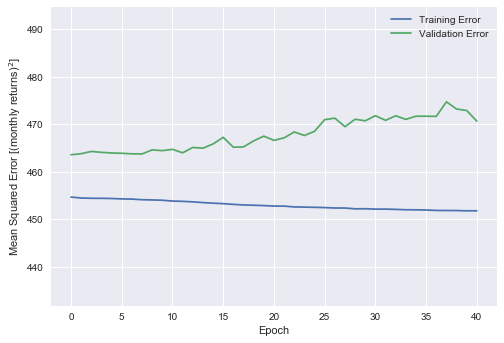

In [217]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=40)

model1_lrearly=NN1_lr()
results_1layer_lrearly = model1_lrearly.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[early_stop,PrintDot()]
                )

plot_learning_curves_mse(results_1layer_lrearly)

In [218]:
# early stopping lr with decay rate (0.001,0.00005)
pred1lrearly=model1_lrearly.predict(X_test)
rsq_pred1lrearly=r_squared(y_test,pred1lrearly) # -0.026534645073059027
rsq_pred1lrearly

-0.026534645073059027


.................................................................................................

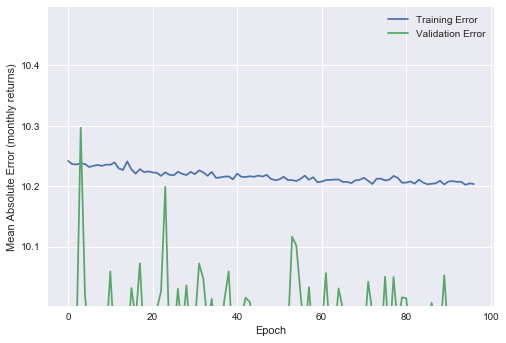

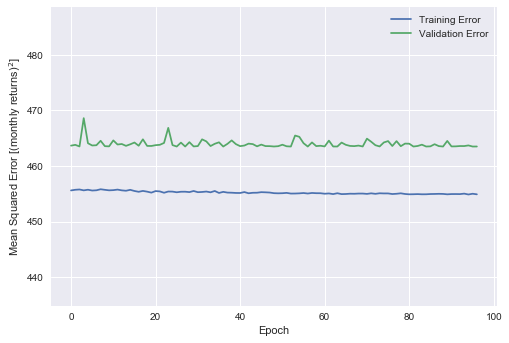

In [221]:
model1_sgdearly=NN1_sgdmomentumlr()
results_1layer_sgdearly = model1_sgdearly.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[early_stop,PrintDot()]
                )

plot_learning_curves_mse(results_1layer_sgdearly)

In [292]:
# early stopping sgd with decay rate (0.01,1e-5)
pred1sgdearly=model1_sgdearly.predict(X_test)
rsq_pred1sgdearly=r_squared(y_test,pred1sgdearly) # 
rsq_pred1sgdearly # -0.001613407210804274

-0.001613407210804274

The early stopping regularisation improves the Adam optimisation from $-7.7\%$ to $-2.7\%$, while it increases the SGD momentum result from $-0.015\%$ to $-0.16\%$. The validation curve spikes mean that early stopping is a less effective regularisation method than for Adam which generally has smoother curves so a clear minimum point can be calculated and overfitting more easily identified.

#### Weight Regularisation

The next regularisation we will include will put constraints on the complexity of the network, penalising it for having large weights, i.e. **weight regularisation**. We will use the **L1 penalty, or the lasso penalty**, where the cost added is proportional to the absolute value of the weight coefficients. This should help prevent the immediate overfitting of our NN1 model.

**Applying L1 regularisation to Adam model**

`Patience parameter=40`

In [224]:
def NN1_lrL1(): # i.e. the optimised model but now with L1
    model = keras.Sequential([
        layers.Dense(36, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dense(6, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    # add the decay term
    optimiser = tf.keras.optimizers.Adam(lr=0.001, decay=0.00005)
    
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_squared_error'])
    return model


............................................

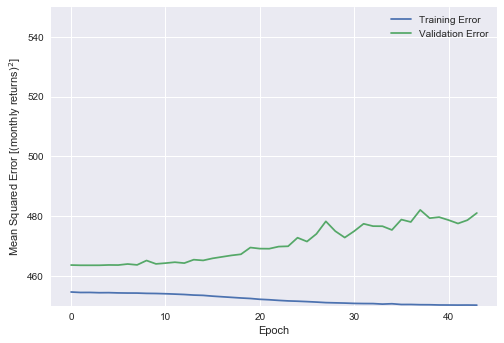

In [226]:
model1_lrL1=NN1_lrL1()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=40)

results_1layer_lrL1 = model1_lrL1.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[early_stop,PrintDot()], batch_size=32
                )

plot_learning_curves_mse_noYlim(results_1layer_lrL1)

In [227]:
# early stopping lr with decay rate (0.001,5e-5), L1 regularisation
pred1lrL1=model1_lrL1.predict(X_test)
rsq_pred1lrL1=r_squared(y_test,pred1lrL1) # 
rsq_pred1lrL1 # -0.057185370105162336

-0.057185370105162336

----------------------------
`Patience parameter=10`


..............

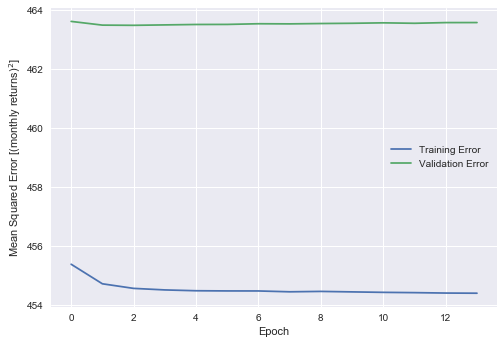

In [242]:
## PATIENCE 10

model1_lrL1v2=NN1_lrL1()

early_stopv2 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

results_1layer_lrL1v2 = model1_lrL1v2.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[early_stopv2,PrintDot()], batch_size=32
                )

plot_learning_curves_mse_noYlim(results_1layer_lrL1v2)

In [243]:
# early stopping PATIENCE 10 lr with decay rate (0.001,5e-5), L1 regularisation
pred1lrL1v2=model1_lrL1v2.predict(X_test)
rsq_pred1lrL1v2=r_squared(y_test,pred1lrL1v2) # 
rsq_pred1lrL1v2 # -0.00047562550832802586

-0.00047562550832802586

With `l1(0.001)`, all the coefficients in the weight matrix of the corresponding layer will add $0.001*\text{weight coefficient}^2$ to the total loss, and so we instead want to minimise our loss function, plus this $\lambda*\sum_j |W^{(j)}|$ term. The results, including early stopping, can be seen above.

#### Analysis of L1 (Adam) regularisation results

The same trend with the validation curve exists, where it rises straight from the beginning, indicating the best fit for the validation set is towards the first few epochs, which has been a consistent problem that regularisation has not seemed to fix. The model appears to fit the training set well as the loss is constantly decreasing. **The predictive power, $R^2$, out of sample also decreases, down to -$5.7\%$, compared to without regularisation, -$2.6\%$**. **When we change the patience parameter for early stopping to 10, the predictive power improves to $-0.04\%$, one of the best results yet**, especially since Adam optimisation was not doing so well in generalising the results, regularisation has helped greatly with that.

**Applying L1 regularisation to SGD momentum model**

`Patience parameter = 40`

In [230]:
def NN1_sgdL1(): # i.e. the optimised model but now with L1
    model = keras.Sequential([
        layers.Dense(36, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dense(6, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    # add the decay term
    optimiser = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9,decay=1e-5)
    
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_squared_error'])
    return model


...............................................................

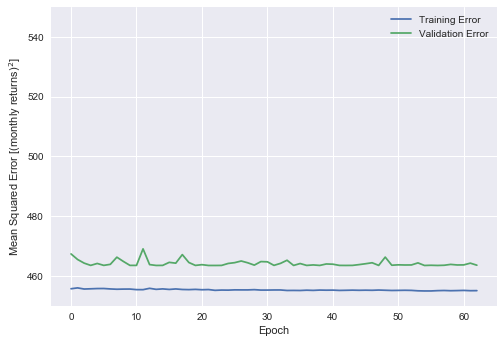

In [231]:
## PATIENCE AT 40

model1_sgdL1=NN1_sgdL1()
results_1layer_sgdL1 = model1_sgdL1.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[early_stop,PrintDot()], batch_size=32
                )

plot_learning_curves_mse_noYlim(results_1layer_sgdL1)

In [245]:
# early stopping SGD with decay rate (0.01,1e-5), L1 regularisation
pred1sgdL1=model1_sgdL1.predict(X_test)
rsq_pred1sgdL1=r_squared(y_test,pred1sgdL1)
rsq_pred1sgdL1 # -0.0026024978232703777

-0.0026024978232703777

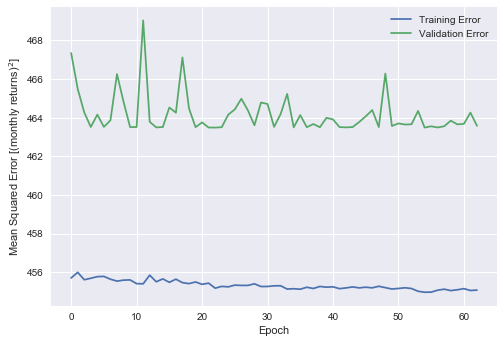

In [244]:
plot_learning_curves_mse_noYlim(results_1layer_sgdL1) # same graph, different y_lims

--------------------------------------
`Patience parameter=10`

In [252]:
## PATIENCE AT 10

model1_sgdL1v2=NN1_sgdL1()
results_1layer_sgdL1v2 = model1_sgdL1v2.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[early_stopv2,PrintDot()], batch_size=32
                )


................................

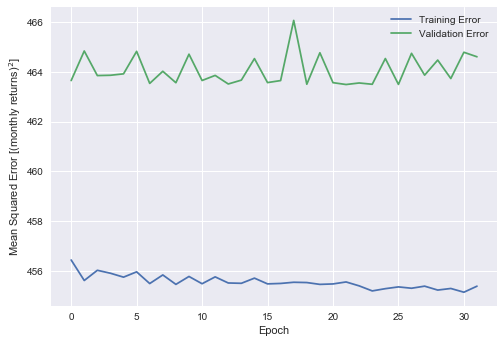

In [253]:
plot_learning_curves_mse_noYlim(results_1layer_sgdL1v2)

In [254]:
# early stopping SGD with decay rate (0.01,1e-5), L1 regularisation (10 patience)
pred1sgdL1v2=model1_sgdL1v2.predict(X_test)
rsq_pred1sgdL1v2=r_squared(y_test,pred1sgdL1v2)
rsq_pred1sgdL1v2 # -0.0003130035747334059

-0.0003130035747334059

#### Analysis of L1 (SGD momentum) regularisation results

The same noise exists in the curves, as stated earlier, Adam will produce smoother learning curves because of how it adapts to the changes in the gradient. The model appears to fit the training set well as the loss is constantly decreasing. **The predictive power, $R^2$, out of sample also decreases, down to -$0.2\%$, compared to without regularisation, -$0.015\%$**. **When we change the patience parameter for early stopping to 10, the predictive power improves to $-0.03\%$, still lagging behind the result without regularisation** - it appears regularisation, specificially early stopping and weight regularisation have not helped SGD momentum in achieving better results.

#### Dropout

Dropout is a very commonly used regularisation technique and is applied to a layer of a neural network. At each step of the gradient descent, some of the hidden units are set to zero at random to encourage robust learning and avoid overfitting. For example:
$$
[1,2,1,4,3]\rightarrow [1,0,1,4,3]
$$

The _dropout rate_ is the fraction of the hidden units that are being dropped. **We will initially try a drop rate of 0.5 inbetween the input layer and the hidden layer, then 0.2 inbetween the hidden layer and the output layer**.

Given the perennial problem of generalising our result and lowering our validation error, we will keep the other regularisation methods in the model.

#### Adding dropout to regularised Adam model

In [309]:
def NN1_lrdrop(): # i.e. the optimised model but now with L1
    model = keras.Sequential([
        layers.Dense(36, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dropout(0.5),
        layers.Dense(6, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
        layers.Dropout(0.2),
        layers.Dense(1)
    ])
    
    # add the decay term
    optimiser = tf.keras.optimizers.Adam(lr=0.001, decay=0.00005)
    
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_squared_error'])
    return model


...................

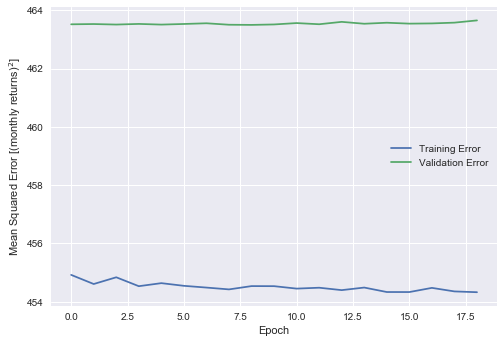

In [310]:
model1_lrdrop=NN1_lrdrop()

results_1layer_lrdrop = model1_lrdrop.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[early_stopv2,PrintDot()], batch_size=32
                )

plot_learning_curves_mse_noYlim(results_1layer_lrdrop)

In [311]:
pred1lrdrop=model1_lrdrop.predict(X_test)
rsq_pred1lrdrop=r_squared(y_test,pred1lrdrop)
rsq_pred1lrdrop # -0.00030576579659902237

-0.00030576579659902237

#### Adding dropout to regularised SGD model

In [312]:
def NN1_sgddrop(): # i.e. the optimised model but now with L1
    model = keras.Sequential([
        layers.Dense(36, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dropout(0.5),
        layers.Dense(6, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
        layers.Dropout(0.2),
        layers.Dense(1)
    ])
    
    # add the decay term
    optimiser = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9,decay=1e-5)
    
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_squared_error'])
    return model


...................................

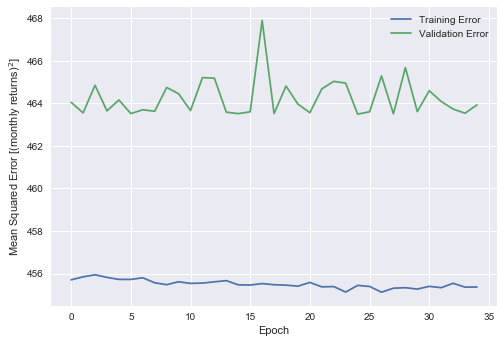

In [313]:
model1_sgddrop=NN1_sgddrop()

results_1layer_sgddrop = model1_sgddrop.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[early_stopv2,PrintDot()], batch_size=32
                )

plot_learning_curves_mse_noYlim(results_1layer_sgddrop)

In [314]:
pred1sgddrop=model1_sgddrop.predict(X_test)
rsq_pred1sgddrop=r_squared(y_test,pred1sgddrop)
rsq_pred1sgddrop # -0.000005.740321024738648

-5.740321024738648e-06

#### Results of dropout regularisation

Dropout improved the out of sample performance of the **Adam model, from $R^2=-0.047\%$ to $R^2=-0.031\%$**, a small absolute improvement, but a relatively large  (proportionally around a third increase). For, **SGD momentum, $R^2$ went from $-0.03\%$ to $-0.0005\%$** a big improvement. We will fully analyse the regularisation results in the next section, but it appears that dropout is a successful regularisation technique for this dataset, for both the differently optimised models.

#### Batch normalisation

As the inputs move through the network, they are adjusted by the weights and various parameters, known as "internal covariate shift". Batch normalisation, as the name suggests, normalises the data in each mini-batch (our sizes are 32) to overcome this issue. In this short section we will apply the batch normalisation regularisation technique to our two quite different optimisation models. 

It is already clear after dropout that the model appears to be heavily regularised, but still improving out of sample results which may hint to a different procedure being needed, but nevertheless we will provide a sanity check to see if batch normalisation improves results.

#### Adam

In [324]:
def NN1_lrbatch(): # i.e. the optimised model but now with L1
    model = keras.Sequential([
        layers.Dense(36, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(6, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.Dense(1)
    ])
    
    # add the decay term
    optimiser = tf.keras.optimizers.Adam(lr=0.001, decay=0.00005)
    
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_squared_error'])
    
    return model


.....................

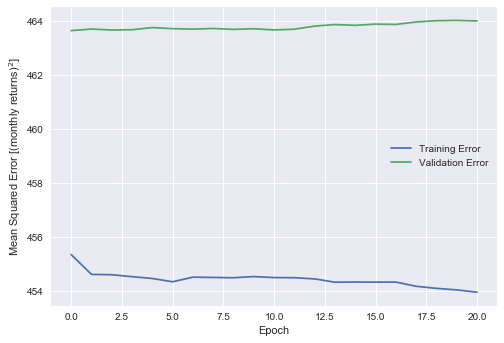

In [325]:
model1_lrbatch=NN1_lrbatch()

results_1layer_lrbatch = model1_lrbatch.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[early_stopv2,PrintDot()], batch_size=32
                )

plot_learning_curves_mse_noYlim(results_1layer_lrbatch)

In [333]:
pred1lrbatch=model1_lrbatch.predict(X_test)
rsq_pred1lrbatch=r_squared(y_test,pred1lrbatch)
rsq_pred1lrbatch # -0.00016574236976851786

-0.00016574236976851786

#### SGD

In [351]:
def NN1_sgdbatch(): # i.e. the optimised model but now with L1
    model = keras.Sequential([
        layers.Dense(36, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(6, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
        layers.Dropout(0.2),
        layers.Dense(1)
    ])
    
    # add the decay term
    optimiser = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9,decay=1e-5)
    
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_squared_error'])
    
    return model


..............................

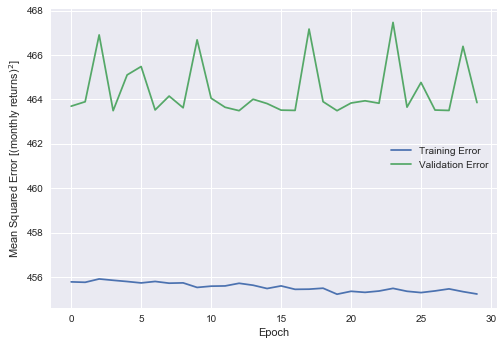

In [352]:
model1_sgdbatch=NN1_sgdbatch()

results_1layer_sgdbatch = model1_sgdbatch.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[early_stopv2,PrintDot()], batch_size=32
                )

plot_learning_curves_mse_noYlim(results_1layer_sgdbatch)

In [353]:
pred1sgdbatch=model1_sgdbatch.predict(X_test)
rsq_pred1sgdbatch=r_squared(y_test,pred1sgdbatch)
rsq_pred1sgdbatch #-0.0043974104945645465

-0.0043974104945645465

#### Analysis of batch normalisation regularisation

Batch normalisation has improved the out of sample performance of the **Adam model, from $R^2=-0.031\%$ to $R^2=-0.016\%$**. For, **SGD momentum, $R^2$ went from $-0.0005\%$ to $-0.4\%$** a big drop in out of sample performance, with only including a single normalisation process after the input layer.

From the out of sample results it appears that the batch normalisation regularisation technique struggled to improve the OOS performance of SGD, but as will be explained in the next section, this may not be so surprising as SGD has not seen massive improvement throughout the regularisation process.

### 2.4.2.2 Regularisation results

,R-squared (%/100)
Baseline NN1,-0.106948
Adam Decay Early(40),-0.026535
SGDmom Decay Early(40),-0.001613
Adam Decay Early(40) L1,-0.057185
SGDmom Decay Early(40) L1,-0.002602
Adam Decay Early(10) L1,-0.000476
SGDmom Decay Early(10) L1,-0.000313
Adam Decay Early(10) L1 Drop,-0.000306
SGDmom Decay Early(10) L1 Drop,-0.000006
Adam Decay Early(10) L1 Drop Batch,-0.000166


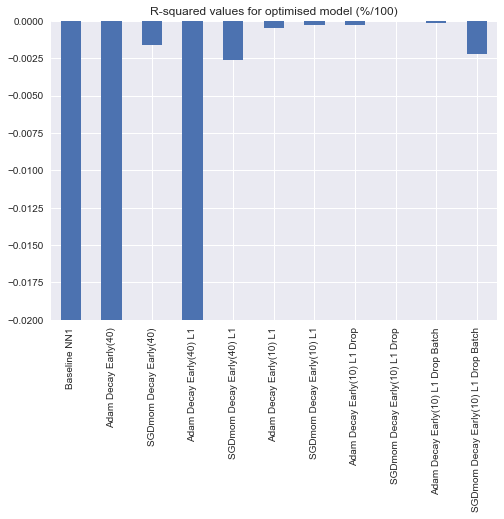

In [345]:
regularise_results=pd.DataFrame([rsq_baseline1,rsq_pred1lrearly,rsq_pred1sgdearly,rsq_pred1lrL1,rsq_pred1sgdL1,rsq_pred1lrL1v2,rsq_pred1sgdL1v2,rsq_pred1lrdrop,rsq_pred1sgddrop,rsq_pred1lrbatch,rsq_pred1sgdbatch])
regularise_results.index=['Baseline NN1','Adam Decay Early(40)','SGDmom Decay Early(40)','Adam Decay Early(40) L1','SGDmom Decay Early(40) L1','Adam Decay Early(10) L1','SGDmom Decay Early(10) L1','Adam Decay Early(10) L1 Drop','SGDmom Decay Early(10) L1 Drop','Adam Decay Early(10) L1 Drop Batch','SGDmom Decay Early(10) L1 Drop Batch']
regularise_results.plot(kind='bar',title='R-squared values for optimised model (%/100)',ylim=[-0.01,0],legend=False)
regularise_results.columns=['R-squared (%/100)']
regularise_results

#### Analysis of regularisation results

The main part of this section is to reduce the overfitting problem that we have identified throughout the process, specifically in the Adam optimiser.

Regularising our model improved the out of sample performance of model NN1, with **SGD momentum with learning rate decay, early boosting, L1 regularisation and dropout** having the best out of sample performance, but **Adam with learning rate decay showed the largest improvements, starting with an $R^2=-7.6\%$ and finishing with $R^2=-0.017\%$ after regularisation**. 

According to the paper referenced earlier, SGD with momentum can lead to better out of sample performance, even if the in-sample performance is worsened, compared to Adam. But, through regularisation, we have found a way to dramatically improve the Adam model so that it is close to par with SGD momentum, while producing learning curves without noise (which was previously a large issue). A side by side comparison of the transformation of our learning curves for the Adam model is shown below:

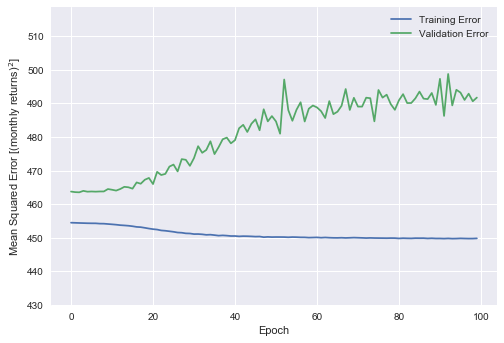

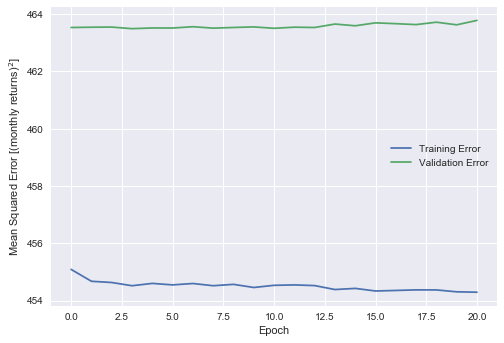

The first thing to notice is that **the level of the validation error has improved dramatically**, now sitting around an MSE of 464, compared to increasing to 490 without regularisation. The position of the validation curve was always the most recurring problem throughout this learning process, and it appears that the regularisation methods that have been successively applied, have successively helped to improve the model's out of sample performance. The SGD momentum model started out with impressive out of sample results, but failed to improve after regularisation.

As well as the level of the validation curve, its noise has also been completely eliminated, which is untrue for SGD after regularisation, keeping its notable batch spikes (again, possibly due to the chronology of the data). Therefore, regularisation appeared to fix a lot of the issues with our learning curves pre-regularisation.

As an aside, the Deep Learning book advise that early stopping should be used almost universally; dropout is an "excellent regularlizer that is easy to implement and comptaible with many models and training algorithms" and that batch normalisation can sometimes reduce generalisation error (reduce our validation error). 

However, as we've added regularisation and as already mentioned, we've introduced flatness into the learning curves, an improvement in the case of the validation error, but we wonder if a model with more capacity could get the validation and training learning curves to converge to a lower validation error and provide better out of sample performance. In other words, there still exists this gap between the validation error and training error, that appears to be a barrier, as none of the $R^2$ values have broken positive values and seem to be stuck around 0 (implying our NN1 model is just as effective as predicting the long-term mean), so perhaps NN2 and NN3 can break this barrier.

Therefore, moving forward, we will focus on the **Adam optimised model ($R^2=-0.017\%$)**, considering the performance advantages it has over SGD with momentum (especially in regards to learning rates), and the performance difference between the two after regularisation is negligible.

## 2.5 Final results
### 2.5.1 Optimising and regularising NN2, NN3, NN4, NN5

Considering time constraints and the complexity of these two models, we will start from the best performing optimised and regularised model from NN1, and apply it to NN2 and NN3, and see how the results are, considering their baseline models outperformed NN1.

Once the learning curves are determined, we can then decide how to proceed with the under/overfitting. Finally, once the predictions have been made, we can decide to move onto NN4, which was the best performing _baseline_ model. The best performing model that we are choosing from NN1 is Adam, with a decaying learning rate and full regularisation (early stopping, L1, dropout and batch normalisation)

**We will choose dropout rates of (0.5, 0.5, 0.2) and (0.5, 0.5, 0.5, 0.2) and use batch normalisation after each layer, with all other parameters as before.**

In [354]:
def NN2_lrbatch():
    model = keras.Sequential([
        layers.Dense(36, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(11, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(3, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.Dense(1)
    ])
    
    optimiser = tf.keras.optimizers.Adam(lr=0.001, decay=0.00005)
    
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_squared_error'])
    
    return model


........................

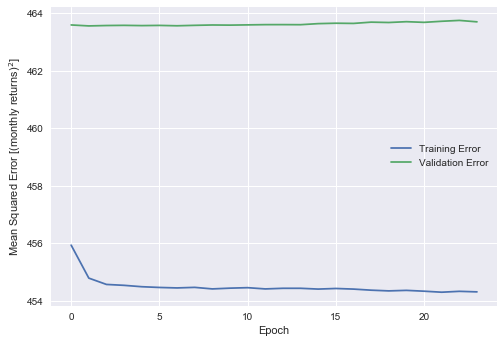

In [355]:
model2_lrbatch=NN2_lrbatch()

results_2layers_lrbatch = model2_lrbatch.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[early_stopv2,PrintDot()], batch_size=32
                )

plot_learning_curves_mse_noYlim(results_2layers_lrbatch)

In [356]:
pred2lrbatch=model2_lrbatch.predict(X_test)
rsq_pred2lrbatch=r_squared(y_test,pred2lrbatch)
rsq_pred2lrbatch # -0.0002544994390505373

-0.0002544994390505373

#### Training NN3

In [357]:
def NN3_lrbatch():
    model = keras.Sequential([
        layers.Dense(36, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(15, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(6, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(2, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.Dense(1)
    ])
    
    optimiser = tf.keras.optimizers.Adam(lr=0.001, decay=0.00005)
    
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_squared_error'])
    
    return model


...........................................................

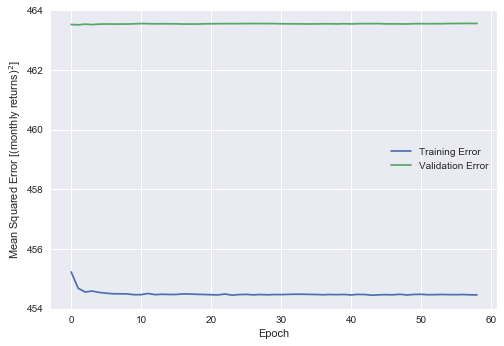

In [358]:
model3_lrbatch=NN3_lrbatch()

results_3layers_lrbatch = model3_lrbatch.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[early_stopv2,PrintDot()], batch_size=32
                )

plot_learning_curves_mse_noYlim(results_3layers_lrbatch)

In [359]:
pred3lrbatch=model3_lrbatch.predict(X_test)
rsq_pred3lrbatch=r_squared(y_test,pred3lrbatch)
rsq_pred3lrbatch # -0.0004679958962401365

-0.0004679958962401365

#### Training NN4

In [360]:
def NN4_lrbatch():
    model = keras.Sequential([
        layers.Dense(36, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(18, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(9, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(4, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(2, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.Dense(1)
    ])
    
    optimiser = tf.keras.optimizers.Adam(lr=0.001, decay=0.00005)
    
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_squared_error'])
    
    return model


..................................................................

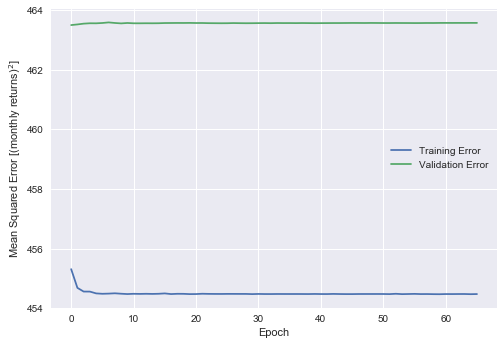

In [361]:
model4_lrbatch=NN4_lrbatch()

results_4layers_lrbatch = model4_lrbatch.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[early_stopv2,PrintDot()], batch_size=32
                )

plot_learning_curves_mse_noYlim(results_4layers_lrbatch)

In [367]:
pred4lrbatch=model4_lrbatch.predict(X_test)
rsq_pred4lrbatch=r_squared(y_test,pred4lrbatch)
rsq_pred4lrbatch # -0.00045844571938902234

-0.00045844571938902234

#### Training NN5

In [363]:
def NN5_lrbatch():
    model = keras.Sequential([
        layers.Dense(36, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(20, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(11, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(6, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(3, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(2, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.Dense(1)
    ])
    
    optimiser = tf.keras.optimizers.Adam(lr=0.001, decay=0.00005)
    
    model.compile(loss='mean_squared_error',
                        optimizer=optimiser,
                        metrics=['mean_squared_error'])
    
    return model


....................................................................................................
..................................................................

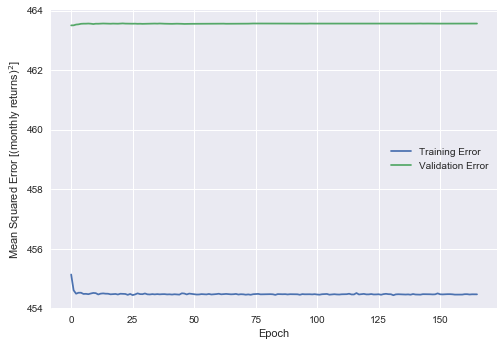

In [364]:
model5_lrbatch=NN5_lrbatch()

results_5layers_lrbatch = model5_lrbatch.fit(
                X_train, y_train,
                epochs=1000, validation_data = (X_valid, y_valid), 
                verbose=0, callbacks=[early_stopv2,PrintDot()], batch_size=32
                )

plot_learning_curves_mse_noYlim(results_5layers_lrbatch)

The results for the NN2 model using optimisations from NN1 is an out of sample performance of $R^2=-0.025\%$, which is a slight downgrade from NN1 model of $R^2=-0.017\%$, while the NN3 model has an out of sample performance of $R^2=-0.047\%$. The results of NN4 is $R^2=-0.046\%$ and for NN5, $R^2=-0.048\%$.
It appears that increasing the complexity of our model has not helped in creating a converging validation and training error, and the generalisation barrier remains difficult to break, with all three more complicated models completely overfitting (with regularisation not strong enough from the NN1 models) (NN3, NN4, NN5); even with much stronger regularisation parameters, NN3 ends up with a worst out of sample performance (tested to be $R^2=-0.048\%$). We've alluded to it before, but this is possibly proof of how disruptive the chronology and panel data is for predicting a time series, i.e. the validation set and the training set may be quite distinct.

As a sanity check, at this point we check what the Deep Learning book has stated to see if we have done a similar process and if our insights have been justified.

+ **First, we check the training data performance**, which we have kept a track of since the beginning in these learning curves. We have had relatively flat curves, but there has always been a dip towards the beginning of the curve, indicating that the neural network is learning the training data very well. For all neural network models, up to 5 hidden layers, the training MSE settles and converges to the same level, again indicating that it is generally fitting the training data well. If the training data is not fit well, it suggests the following:
    - **Try increasing the complexity of the model**. We have done this by including neural networks up to 5 hidden laters, each following a geometric pyramid model.
    - **Improve the learning algorithm, e.g. tune the learning rate hyperparameter**; this was the first step of our optimisation process
+ **Measure performance on test set**; we completed this after the optimisation process, and regularisation process - they suggest that if the test performance is much worse than training performance (which it was in our case), then gathering more data is very effective

So finally we can conclude that we believe the validation dataset is sufficiently different from the training dataset, and the validation error has hit a barrier. Since this has happened it is difficult to tune our learning curves, which would be effective if we could see a saddle point in the validation error (indicating overfitting), or a noticeable drop in the validation error for the first few epochs which would indicate the model can predict the validation set better, as it learns the training data smoothly, and then they ideally converge.

A possible solution to this problem, other than gathering data, may lie in performing special cross-validation processes, such as nested cross-validation, although that has the effect of reducing our already small training data.

The process for tuning parameters is also similar to their recommendation (as stated at the start of section 2) in utilising learning curves to determine whether we have under or overfit.

The final results for the different methods are shown below.

In [370]:
pred3lrbatch=model3_lrbatch.predict(X_test)
rsq_pred3lrbatch=r_squared(y_test,pred3lrbatch)
rsq_pred3lrbatch # -0.0004679958962401365

-0.000489825196384297

,0,1
NN1,-0.106948,-0.000166
NN2,-0.092171,-0.000254
NN3,-0.024225,-0.000490
NN4,-0.000496,-0.000458
NN5,-0.142998,-0.000482


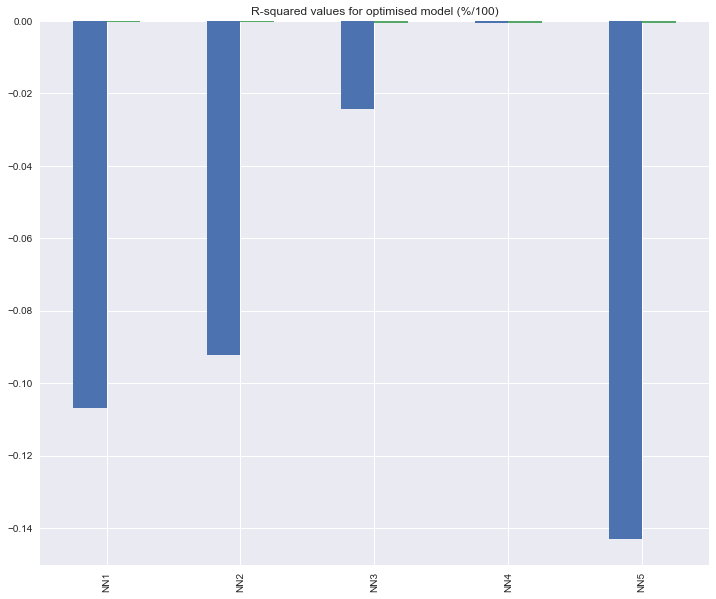

In [393]:
final_results=pd.DataFrame([[rsq_baseline1,rsq_pred1lrbatch],[rsq_baseline2,rsq_pred2lrbatch],[rsq_baseline3,rsq_pred3lrbatch],[rsq_baseline4,rsq_pred4lrbatch],[rsq_baseline5,rsq_pred5lrbatch]])
final_results.index=['NN1','NN2','NN3','NN4','NN5']
final_results.plot(kind='bar',title='R-squared values for optimised model (%/100)',legend=False,figsize=(12,10))
final_results

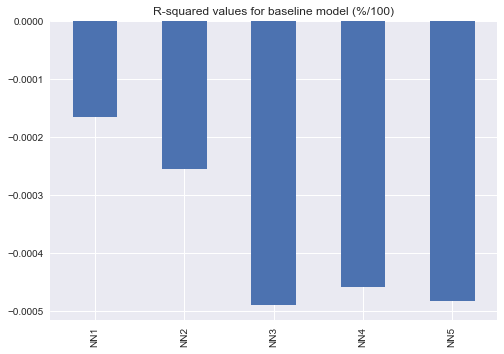

In [394]:
baseline_results=pd.DataFrame([rsq_pred1lrbatch,rsq_pred2lrbatch,rsq_pred3lrbatch,rsq_pred4lrbatch,rsq_pred5lrbatch])
baseline_results.index=['NN1','NN2','NN3','NN4','NN5']
baseline_results.plot(kind='bar',title='R-squared values for baseline model (%/100)',legend=False)

# 3 Including past returns as predictors

Add up to 3 months of past returns as predictors. Tune model and hyperparameters with validation set.

Do predictions improve? Economic interpretation of results.

In [1]:
# run R in python Kernal
%load_ext rpy2.ipython

In [2]:
%%R
# Big Data Presentation
library(tidyverse)
library(keras)
library(lubridate)
use_session_with_seed(0, quiet = TRUE) # Set seed for neural network
#----------------------------------------------------------------------------#
#Setup and Introuction
#----------------------------------------------------------------------------#
#setwd("/Users/colin/Desktop/Imperial\ College/Big\ Data\ 2")
data = read_csv('Stocks_data.csv')

# Explore the data
glimpse(data)

# Clean Data
data_cleaned = data %>%
  select(-GVKEY, -cusip, -conm, -year, -yearmonth, -csp) %>%  # Remove certain columns
  mutate(trt1m = trt1m/100) %>%                               # Convert Monthly Total Return to percentage
  mutate_at(vars(tic), factor) %>%                            # Convert tic to factor
  mutate_at(vars(datadate), ymd) %>%                          # Convert datadate to Date object
  rename(Date = datadate) %>%                                 # Rename  datadate
  arrange(Date) %>%                                           # Sort Date in ascending order
  mutate_at(vars(tic), droplevels)

any(is.na(data_cleaned))
data_cleaned = data_cleaned[complete.cases(data_cleaned), ]   # Remove rows containing NA values
glimpse(data_cleaned)                                         # View the structure of cleaned data

# Split data into training, validation and testing set
date = unique(data_cleaned$Date)                              # Extract unique date from the dataset
train_cutoff = quantile(1:nrow(data_cleaned), 0.4)            # Set the cutting point for training period
val_cutoff = quantile(1: nrow(data_cleaned), 0.8)             # Set the cutting point for validation period

# Record the number of firm within each time period
data_summary = data_cleaned %>%
  group_by(Date) %>%
  summarize(num = n()) %>%
  mutate(cum = cumsum(num)) %>%
  ungroup()
# Define training/ validation/ testing period
train_period = data_summary %>% 
  filter(cum < train_cutoff) %>%
  '$' (Date)
val_period = data_summary %>%
  filter(cum > train_cutoff & cum < val_cutoff) %>%
  '$' (Date)
test_period = data_summary %>%
  filter(cum > val_cutoff) %>%
  '$' (Date)

# Split data into train/ validation/ testing dataset
train = data_cleaned %>% 
  filter(Date %in% train_period)
val = data_cleaned %>%
  filter(Date %in% val_period)
test = data_cleaned %>%
  filter(Date %in% test_period)

C:\Users\timzh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
%%R
# Q3 
# Retrieve the members within each training period
train_stocks3 = train %>%
  group_by(tic) %>%                     # Group dataset by company
  summarize(num = n()) %>%              # summarize how many observation we have for each firm within training 
  ungroup() %>%
  filter(num > 3) %>%                   # Filiter those having more than 3 obs out
  '$' (tic) %>%
  droplevels()
val_stocks3 = val %>%                   # Same as above
  group_by(tic) %>%
  summarize(num = n()) %>%
  ungroup() %>%
  filter(num > 3) %>%
  '$' (tic) %>%
  droplevels()
test_stocks3 = test %>%                 # Same as above
  group_by(tic) %>%
  summarize(num = n()) %>%
  ungroup() %>%
  filter(num > 3) %>%
  '$' (tic) %>%
  droplevels()


# Further split dataset id each period into features and labels
train_x3 = train %>%
  filter(tic %in% train_stocks3) %>%                                           # Filter companies included in the training list
  nest(-tic) %>%                                                               # Nest data by firm
  mutate_at(vars(data), ~map(., function(x){x[1:(nrow(x)-3), ]})) %>%          # select the first (N-3) obs for each firm
  unnest() %>%
  select(-tic, -Date, -trt1m) %>%                                              # Remove three columns: tic, Date and trt1m
  scale() %>%                                                                  # Standardise the data
  data.frame() %>%
  as.matrix
train_y3 = train %>%
  filter(tic %in% train_stocks3) %>%                                          # Filter companies included in the training list
  nest(-tic) %>%                                                              # Nest data by firm
  mutate_at(vars(data), ~map(., function(x){x[4:nrow(x), ]})) %>%             # Remove the first three obs for each firm
  unnest() %>%
  select(trt1m) %>%                                                           # Select trt1m column only
  scale() %>%
  data.frame() %>%
  as.matrix

val_x3 = val %>%                                                              # Same as above
  filter(tic %in% val_stocks3) %>%
  nest(-tic) %>%
  mutate_at(vars(data), ~map(., function(x){x[1:(nrow(x)-3), ]})) %>%
  unnest() %>%
  select(-tic, -Date, -trt1m) %>%
  scale() %>%
  data.frame() %>%
  as.matrix()
val_y3 = val %>%                                                             # Same as above
  filter(tic %in% val_stocks3) %>%
  nest(-tic) %>%
  mutate_at(vars(data), ~map(., function(x){x[4:nrow(x), ]})) %>%
  unnest() %>%
  select(trt1m) %>%
  scale() %>%
  data.frame() %>%
  as.matrix()

test_x3 = test %>%                                                            # Same as above
  filter(tic %in% test_stocks3) %>%
  nest(-tic) %>%
  mutate_at(vars(data), ~map(., function(x){x[1:(nrow(x)-3), ]})) %>%
  unnest() %>%
  select(-tic, -Date, -trt1m) %>%
  scale() %>%
  data.frame() %>%
  as.matrix()
test_y3 = test %>%                                                            # Same as above
  filter(tic %in% test_stocks3) %>%
  nest(-tic) %>%
  mutate_at(vars(data), ~map(., function(x){x[4:nrow(x), ]})) %>%
  unnest() %>%
  select(trt1m) %>%
  scale() %>%
  data.frame() %>%
  as.matrix()

# Remove columns that are NaN
train_nan = train_x3 %>%
  as_tibble() %>%
  select_if(~any(is.nan(.))) %>%
  colnames()
val_nan = val_x3 %>%
  as_tibble() %>%
  select_if(~any(is.nan(.))) %>%
  colnames()
test_nan = test_x3 %>%
  as_tibble() %>%
  select_if(~any(is.nan(.))) %>%
  colnames()
train_nan                                      # R&D_to_Sales, Operating_profitability
val_nan                                        # R&D_to_Sales, Operating_profitability
test_nan                                       # R&D_to_Sales, Operating_profitability

# Finalise the data
train_x3 = train_x3 %>%
  as_tibble() %>%
  select(-train_nan) %>%
  as.matrix()
val_x3 = val_x3 %>%
  as_tibble() %>%
  select(-val_nan) %>%
  as.matrix()
test_x3 = test_x3%>%
  as_tibble() %>%
  select(-test_nan) %>%
  as.matrix()

dim(train_x3)
dim(train_y3)
dim(val_x3)
dim(val_y3)
dim(test_x3)
dim(test_y3)

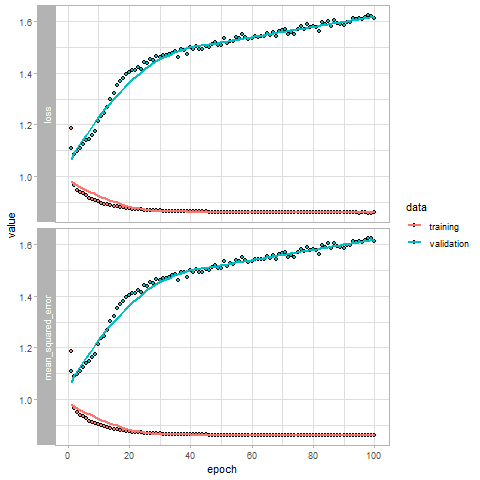

In [24]:
%%R
# Neural Network with one hidden layer
# Layer 1: Baseline Model

use_session_with_seed(0, quiet = TRUE) # Set seed for neural network

model_l1_base = keras_model_sequential() %>%
  layer_dense(units = round(sqrt(ncol(train_x3))),
              activation = 'relu', 
              input_shape = ncol(train_x3),
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units =  1)

model_l1_base %>% 
  compile(loss = 'mean_squared_error', 
          optimizer = optimizer_adam(), 
          metric = c('mean_squared_error'))
summary(model_l1_base)


fit_l1_base = model_l1_base %>%
  fit(train_x3, train_y3,
      epochs = 100, 
      batch_size = 200,
      validation_data = list(val_x3, val_y3),
      verbose = 0)

plot(fit_l1_base) + theme_light()

In [25]:
%%R
pred_l1_base = predict(model_l1_base, test_x3, batch_size = 200, epochs = 100)
perf_l1_baseline = pred_l1_base %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l1_baseline = perf_l1_baseline %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l1_baseline

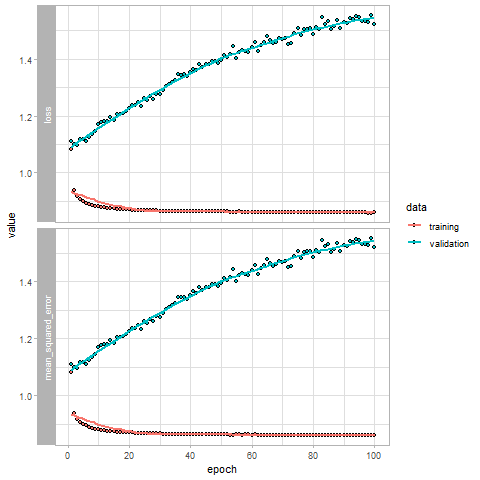

In [26]:
%%R
# 1 layer: adam optimiser + call back
use_session_with_seed(0, quiet = TRUE) # Set seed for neural network
model_l1_adam = keras_model_sequential() %>%
  layer_dense(units = round(sqrt(ncol(train_x3))),
              activation = 'relu', 
              input_shape = ncol(train_x3)) %>%
  layer_dense(units = 1)

model_l1_adam %>%
  compile(optimizer = optimizer_adam(),
          loss = "mean_squared_error", 
          metric = c("mean_squared_error"))

fit_l1_adam = model_l1_adam %>%
  fit(train_x3, train_y3,
      epochs = 100,
      batch_size = 200,
      validation_data = list(val_x3, val_y3),
      verbose = 0,
      call_backs = list(callback_early_stopping(monitor = "val_loss",
                                                min_delta = 0.001,
                                                patience = 5,
                                                verbose = 0)))

plot(fit_l1_adam) + theme_light()

In [27]:
%%R
pred_l1_adam = predict(model_l1_adam, test_x3, epochs = 100, batch_size = 200)
perf_l1_adam = pred_l1_adam %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l1_adam = perf_l1_adam %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l1_adam

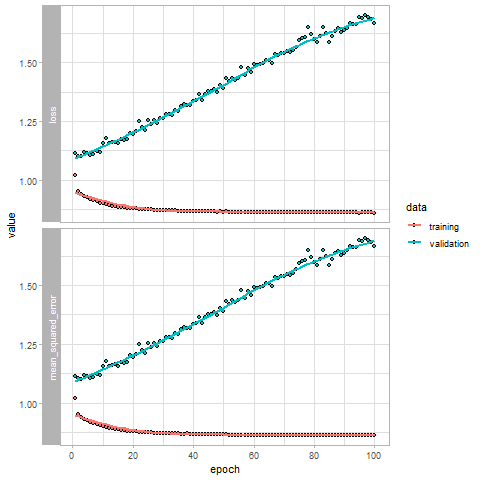

In [28]:
%%R
# 1 layer: SGD + call back
use_session_with_seed(0, quiet = TRUE)

model_l1_sgd = keras_model_sequential() %>%
  layer_dense(units = round(sqrt(ncol(train_x3))),
              activation = 'relu', 
              input_shape = ncol(train_x3)) %>%
  layer_dense(units = 1)

model_l1_sgd %>%
  compile(optimizer = optimizer_sgd(),
          loss = "mean_squared_error", 
          metric = c("mean_squared_error"))

fit_l1_sgd = model_l1_sgd %>%
  fit(train_x3, train_y3,
      epochs = 100,
      batch_size = 200,
      validation_data = list(val_x3, val_y3),
      verbose = 0,
      call_backs = list(callback_early_stopping(monitor = "val_loss",
                                                min_delta = 0.001,
                                                patience = 5,
                                                verbose = 0)))

plot(fit_l1_sgd) + theme_light()

In [29]:
%%R
pred_l1_sgd = predict(model_l1_sgd, test_x3, epochs = 100, batch_size = 200)
perf_l1_sgd = pred_l1_sgd %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l1_sgd = perf_l1_sgd %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l1_sgd

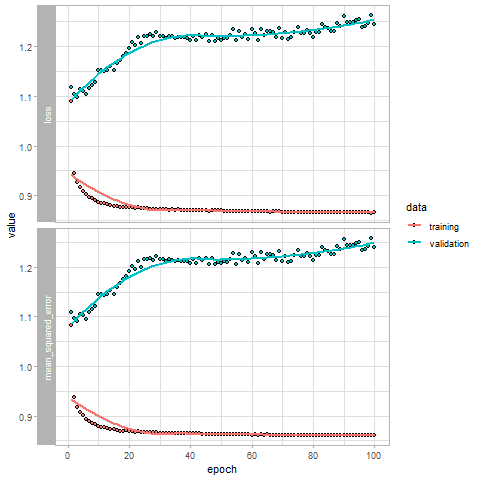

In [30]:
%%R
# 1 Layer: adam + call back + L2
use_session_with_seed(0, quiet = TRUE) 
model_l1_adam_L2 = keras_model_sequential() %>%
  layer_dense(units = round(sqrt(ncol(train_x3))),
              activation = 'relu', 
              input_shape = ncol(train_x3),
              kernel_regularizer = regularizer_l2(l = 0.001)) %>%
  layer_dense(units = 1)

model_l1_adam_L2 %>%
  compile(optimizer = optimizer_adam(),
          loss = "mean_squared_error", 
          metric = c("mean_squared_error"))

fit_l1_adam_L2 = model_l1_adam_L2 %>%
  fit(train_x3, train_y3,
      epochs = 100,
      batch_size = 200,
      validation_data = list(val_x3, val_y3),
      verbose = 0,
      call_backs = list(callback_early_stopping(monitor = "val_loss",
                                                min_delta = 0.001,
                                                patience = 5,
                                                verbose = 0)))

plot(fit_l1_adam_L2) + theme_light()

In [31]:
%%R
pred_l1_adam_L2 = predict(model_l1_adam_L2, test_x3, epochs = 100, batch_size = 200)
perf_l1_adam_L2 = pred_l1_adam_L2 %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l1_adam_L2 = perf_l1_adam_L2 %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l1_adam_L2

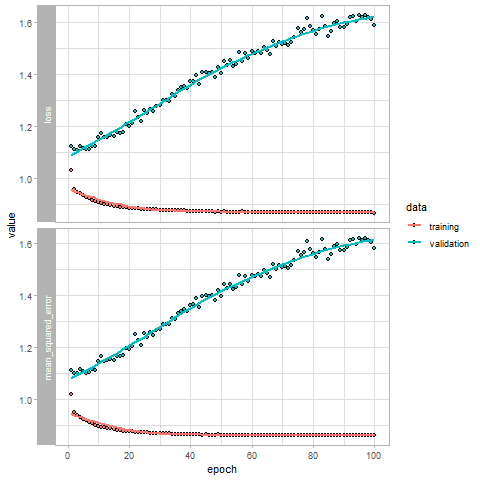

In [32]:
%%R
# 1 Layer: sgd + callback + L2
use_session_with_seed(0, quiet = TRUE)

model_l1_sgd_L2 = keras_model_sequential() %>%
  layer_dense(units = round(sqrt(ncol(train_x3))),
              activation = 'relu', 
              input_shape = ncol(train_x3), 
              kernel_regularizer = regularizer_l2(l = 0.001)) %>%
  layer_dense(units = 1)

model_l1_sgd_L2 %>%
  compile(optimizer = optimizer_sgd(),
          loss = "mean_squared_error", 
          metric = c("mean_squared_error"))

fit_l1_sgd_L2 = model_l1_sgd_L2 %>%
  fit(train_x3, train_y3,
      epochs = 100,
      batch_size = 200,
      validation_data = list(val_x3, val_y3),
      verbose = 0,
      call_backs = list(callback_early_stopping(monitor = "val_loss",
                                                min_delta = 0.001,
                                                patience = 5,
                                                verbose = 0)))

plot(fit_l1_sgd_L2) + theme_light()

In [33]:
%%R
pred_l1_sgd_L2 = predict(model_l1_sgd_L2, test_x3, epochs = 100, batch_size = 200)
perf_l1_sgd_L2 = pred_l1_sgd_L2 %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l1_sgd_L2 = perf_l1_sgd_L2 %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l1_sgd_L2

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


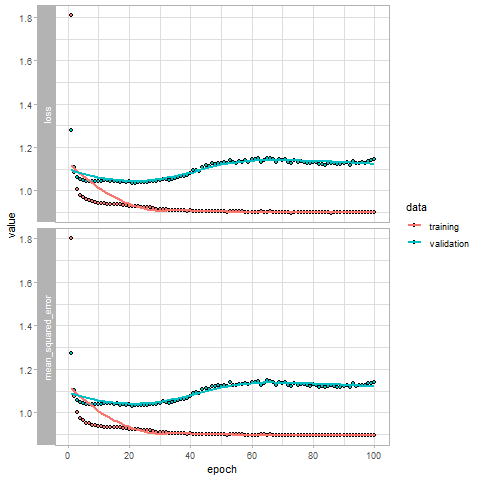

In [34]:
%%R
# 1 Layer: adam + call back + L2 + drop

use_session_with_seed(0, quiet = TRUE)

model_l1_adam_L2_drop = keras_model_sequential() %>%
  layer_dense(units = round(sqrt(ncol(train_x3))),
              activation = 'relu', 
              input_shape = ncol(train_x3),
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1),
              kernel_regularizer = regularizer_l2(l = 0.001)) %>%
  layer_dropout(rate = 0.2) %>%
  layer_dense(units = 1)

model_l1_adam_L2_drop %>%
  compile(optimizer = optimizer_adam(),
          loss = "mean_squared_error", 
          metric = c("mean_squared_error"))

fit_l1_adam_L2_drop = model_l1_adam_L2_drop %>%
  fit(train_x3, train_y3,
      epochs = 100,
      batch_size = 200,
      validation_data = list(val_x3, val_y3),
      verbose = 0,
      call_backs = list(callback_early_stopping(monitor = "val_loss",
                                                min_delta = 0.001,
                                                patience = 5,
                                                verbose = 0)))

plot(fit_l1_adam_L2_drop) + theme_light()

In [35]:
%%R
pred_l1_adam_L2_drop = predict(model_l1_adam_L2_drop, test_x3, epochs = 100, batch_size = 200)
perf_l1_adam_L2_drop = pred_l1_adam_L2_drop %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l1_adam_L2_drop = perf_l1_adam_L2_drop %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l1_adam_L2_drop

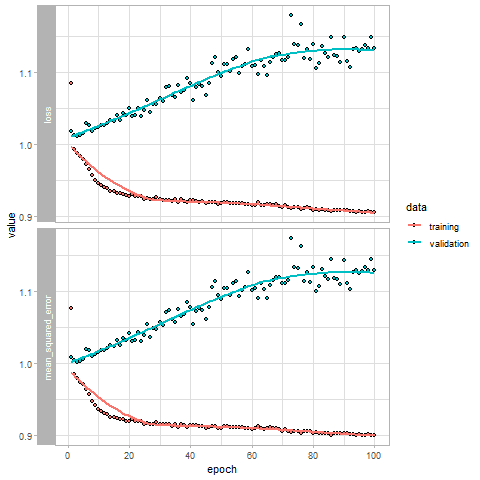

In [36]:
%%R
# 1 Layer: sgd + call back + L2 + drop
use_session_with_seed(0, quiet = TRUE)

model_l1_sgd_L2_drop = keras_model_sequential() %>%
  layer_dense(units = round(sqrt(ncol(train_x3))),
              activation = 'relu', 
              input_shape = ncol(train_x3), 
              kernel_regularizer = regularizer_l2(l = 0.001), 
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)
  ) %>%
  layer_dropout(rate = 0.2) %>%
  layer_dense(units = 1)

model_l1_sgd_L2_drop %>%
  compile(optimizer = optimizer_sgd(),
          loss = "mean_squared_error", 
          metric = c("mean_squared_error"))

fit_l1_sgd_L2_drop = model_l1_sgd_L2_drop %>%
  fit(train_x3, train_y3,
      epochs = 100,
      batch_size = 200,
      validation_data = list(val_x3, val_y3),
      verbose = 0,
      call_backs = list(callback_early_stopping(monitor = "val_loss",
                                                min_delta = 0.001,
                                                patience = 5,
                                                verbose = 0)))
plot(fit_l1_sgd_L2_drop) +theme_light()

In [37]:
%%R
pred_l1_sgd_L2_drop = predict(model_l1_sgd_L2_drop, test_x3, epochs = 100, batch_size = 200)
perf_l1_sgd_L2_drop = pred_l1_sgd_L2_drop %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l1_sgd_L2_drop = perf_l1_sgd_L2_drop %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l1_sgd_L2_drop

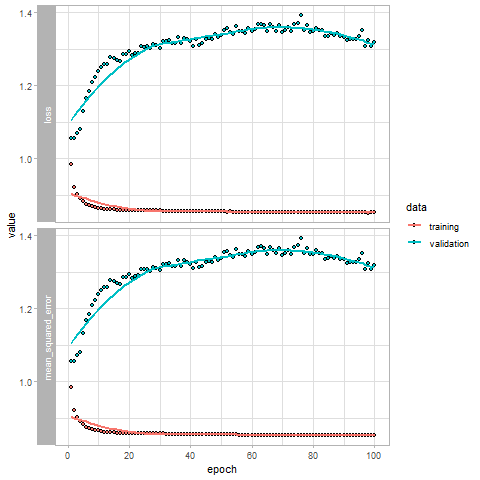

In [38]:
%%R
# 2 layers: baseline
use_session_with_seed(0, quiet = TRUE)
model_l2_base= keras_model_sequential() %>%
  layer_dense(units = round(ncol(train_x3)^(2/3)),
              activation = 'relu', 
              input_shape = ncol(train_x3), 
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = round(ncol(train_x3)^(1/3)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = 1)

model_l2_base %>% compile(loss = 'mean_squared_error', 
                     optimizer = optimizer_adam(), 
                     metric = c('mean_squared_error'))
summary(model_l2_base)

fit_l2_base = model_l2_base %>%
  fit(train_x3, train_y3,
      epochs = 100, 
      batch_size = 200, 
      validation_data = list(val_x3, val_y3),
      verbose = 0)
plot(fit_l2_base) +  theme_light()

In [39]:
%%R
pred_l2_base = predict(model_l2_base, test_x3, batch_size = 200, epochs = 100)
perf_l2_base = pred_l2_base %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l2_baseline = perf_l2_base %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l2_baseline

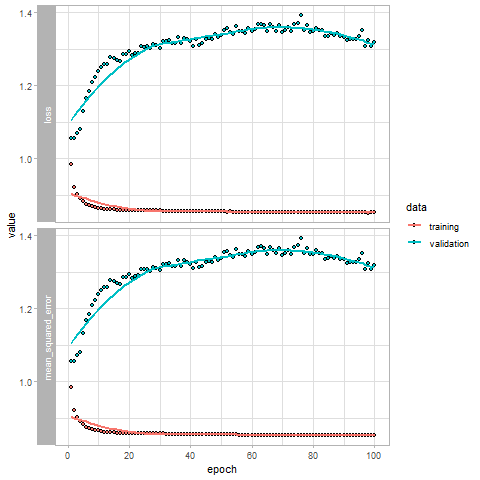

In [40]:
%%R
# 2 layers: adam + call_back
use_session_with_seed(0, quiet = TRUE)
model_l2_adam= keras_model_sequential() %>%
  layer_dense(units = round(ncol(train_x3)^(2/3)),
              activation = 'relu', 
              input_shape = ncol(train_x3), 
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = round(ncol(train_x3)^(1/3)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = 1)

model_l2_adam %>% compile(loss = 'mean_squared_error', 
                          optimizer = optimizer_adam(), 
                          metric = c('mean_squared_error'))
summary(model_l2_adam)

fit_l2_adam = model_l2_adam %>%
  fit(train_x3, train_y3,
      epochs = 100, 
      batch_size = 200, 
      validation_data = list(val_x3, val_y3),
      verbose = 0,
      call_backs = list(callback_early_stopping(monitor = "val_loss",
                                                min_delta = 0.001,
                                                patience = 5,
                                                verbose = 0)))
plot(fit_l2_adam) + theme_light()

In [41]:
%%R
pred_l2_adam = predict(model_l2_adam, test_x3, natch_size = 200, epochs = 100)
perf_l2_adam = pred_l2_adam %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l2_adam = perf_l2_adam %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l2_adam

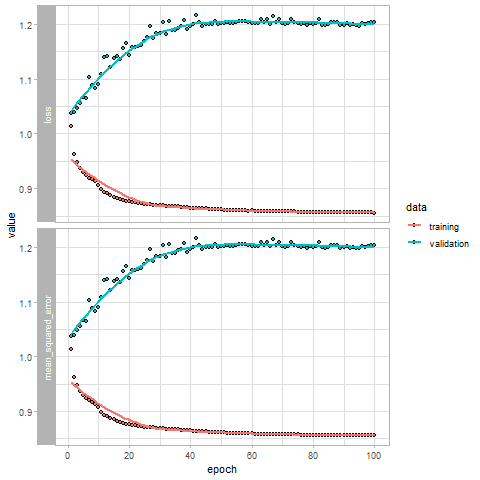

In [42]:
%%R
# l2: sgd + call back
use_session_with_seed(0, quiet = TRUE)
model_l2_sgd= keras_model_sequential() %>%
  layer_dense(units = round(ncol(train_x3)^(2/3)),
              activation = 'relu', 
              input_shape = ncol(train_x3), 
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = round(ncol(train_x3)^(1/3)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = 1)

model_l2_sgd %>% compile(loss = 'mean_squared_error', 
                          optimizer = optimizer_sgd(), 
                          metric = c('mean_squared_error'))
summary(model_l2_sgd)

fit_l2_sgd = model_l2_sgd %>%
  fit(train_x3, train_y3,
      epochs = 100, 
      batch_size = 200, 
      validation_data = list(val_x3, val_y3),
      verbose = 0,
      call_backs = list(callback_early_stopping(monitor = "val_loss",
                                                min_delta = 0.001,
                                                patience = 5,
                                                verbose = 0)))
plot(fit_l2_sgd) +theme_light()

In [43]:
%%R
pred_l2_sgd = predict(model_l2_sgd, test_x3, batch_size = 200, epochs = 100)
perf_l2_sgd = pred_l2_sgd %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l2_sgd = perf_l2_sgd %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l2_sgd

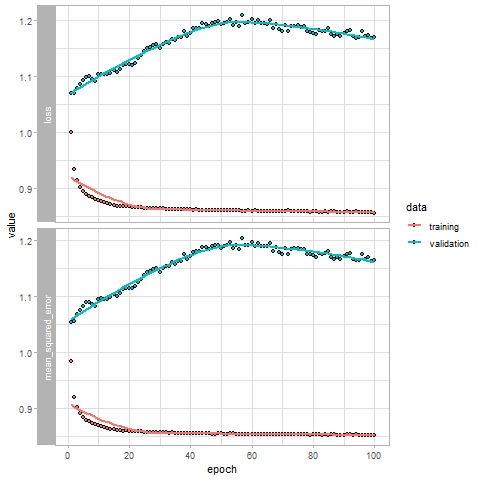

In [44]:
%%R
# 2 layers: adam + call back + L2
use_session_with_seed(0, quiet = TRUE)
model_l2_adam_L2= keras_model_sequential() %>%
  layer_dense(units = round(ncol(train_x3)^(2/3)),
              activation = 'relu', 
              input_shape = ncol(train_x3), 
              kernel_regularizer = regularizer_l2(l = 0.001),
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = round(ncol(train_x3)^(1/3)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = 1)

model_l2_adam_L2 %>% compile(loss = 'mean_squared_error', 
                          optimizer = optimizer_adam(), 
                          metric = c('mean_squared_error'))
summary(model_l2_adam_L2)

fit_l2_adam_L2 = model_l2_adam_L2 %>%
  fit(train_x3, train_y3,
      epochs = 100, 
      batch_size = 200, 
      validation_data = list(val_x3, val_y3),
      verbose = 0,
      call_backs = list(callback_early_stopping(monitor = "val_loss",
                                                min_delta = 0.001,
                                                patience = 5,
                                                verbose = 0)))
plot(fit_l2_adam_L2) + theme_light()

In [45]:
%%R
pred_l2_adam_L2 = predict(model_l2_adam_L2, test_x3, natch_size = 200, epochs = 100)
perf_l2_adam_L2 = pred_l2_adam_L2 %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l2_adam_L2 = perf_l2_adam_L2 %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l2_adam_L2

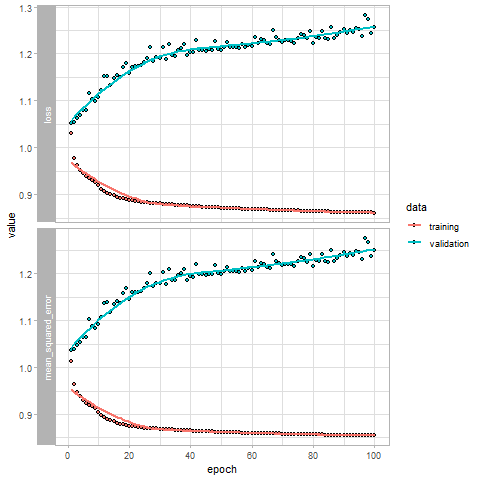

In [46]:
%%R
# l2: sgd + call back + L2
use_session_with_seed(0, quiet = TRUE)
model_l2_sgd_L2= keras_model_sequential() %>%
  layer_dense(units = round(ncol(train_x3)^(2/3)),
              activation = 'relu', 
              input_shape = ncol(train_x3), 
              kernel_regularizer = regularizer_l2(l = 0.001),
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = round(ncol(train_x3)^(1/3)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = 1)

model_l2_sgd_L2 %>% compile(loss = 'mean_squared_error', 
                         optimizer = optimizer_sgd(), 
                         metric = c('mean_squared_error'))
summary(model_l2_sgd_L2)

fit_l2_sgd_L2 = model_l2_sgd_L2 %>%
  fit(train_x3, train_y3,
      epochs = 100, 
      batch_size = 200, 
      validation_data = list(val_x3, val_y3),
      verbose = 0,
      call_backs = list(callback_early_stopping(monitor = "val_loss",
                                                min_delta = 0.001,
                                                patience = 5,
                                                verbose = 0)))
plot(fit_l2_sgd_L2) + theme_light()

In [47]:
%%R
pred_l2_sgd_L2 = predict(model_l2_sgd_L2, test_x3, batch_size = 200, epochs = 100)
perf_l2_sgd_L2 = pred_l2_sgd_L2 %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l2_sgd_L2 = perf_l2_sgd_L2 %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l2_sgd_L2

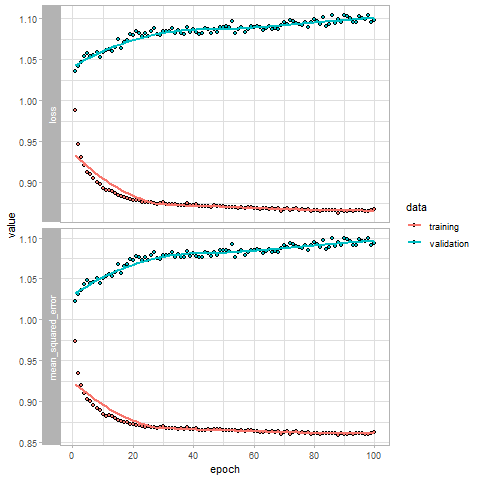

In [48]:
%%R
# 2 layer: adam + callback + L2 + drop
use_session_with_seed(0, quiet = TRUE)
model_l2_adam_L2_drop= keras_model_sequential() %>%
  layer_dense(units = round(ncol(train_x3)^(2/3)),
              activation = 'relu', 
              input_shape = ncol(train_x3), 
              kernel_regularizer = regularizer_l2(l = 0.001),
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dropout(rate = 0.1) %>%
  layer_dense(units = round(ncol(train_x3)^(1/3)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = 1)

model_l2_adam_L2_drop %>% compile(loss = 'mean_squared_error', 
                          optimizer = optimizer_adam(), 
                          metric = c('mean_squared_error'))
summary(model_l2_adam_L2_drop)

fit_l2_adam_L2_drop = model_l2_adam_L2_drop %>%
  fit(train_x3, train_y3,
      epochs = 100, 
      batch_size = 200, 
      validation_data = list(val_x3, val_y3),
      verbose = 0,
      call_backs = list(callback_early_stopping(monitor = "val_loss",
                                                min_delta = 0.001,
                                                patience = 5,
                                                verbose = 0)))
plot(fit_l2_adam_L2_drop) + theme_light()

In [49]:
%%R
pred_l2_adam_L2_drop = predict(model_l2_adam_L2_drop, test_x3, natch_size = 200, epochs = 100)
perf_l2_adam_L2_drop = pred_l2_adam_L2_drop %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l2_adam_L2_drop = perf_l2_adam_L2_drop %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l2_adam_L2_drop

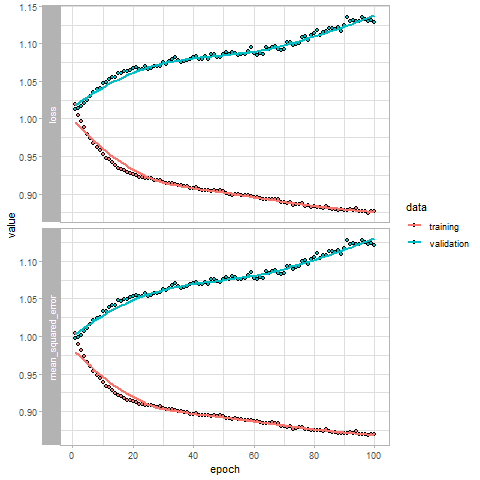

In [50]:
%%R
# 2 layer: sgd + callback + L2 + drop
use_session_with_seed(0, quiet = TRUE)
model_l2_sgd_L2_drop= keras_model_sequential() %>%
  layer_dense(units = round(ncol(train_x3)^(2/3)),
              activation = 'relu', 
              input_shape = ncol(train_x3), 
              kernel_regularizer = regularizer_l2(l = 0.001),
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dropout(rate = 0.1) %>%
  layer_dense(units = round(ncol(train_x3)^(1/3)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = 1)

model_l2_sgd_L2_drop %>% compile(loss = 'mean_squared_error', 
                               optimizer = optimizer_sgd(), 
                               metric = c('mean_squared_error'))
summary(model_l2_sgd_L2_drop)

fit_l2_sgd_L2_drop = model_l2_sgd_L2_drop %>%
  fit(train_x3, train_y3,
      epochs = 100, 
      batch_size = 200, 
      validation_data = list(val_x3, val_y3),
      verbose = 0,
      call_backs = list(callback_early_stopping(monitor = "val_loss",
                                                min_delta = 0.001,
                                                patience = 5,
                                                verbose = 0)))
plot(fit_l2_sgd_L2_drop) + theme_light()

In [51]:
%%R
pred_l2_sgd_L2_drop = predict(model_l2_sgd_L2_drop, test_x3, natch_size = 200, epochs = 100)
perf_l2_sgd_L2_drop = pred_l2_sgd_L2_drop %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l2_sgd_L2_drop = perf_l2_sgd_L2_drop %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l2_sgd_L2_drop

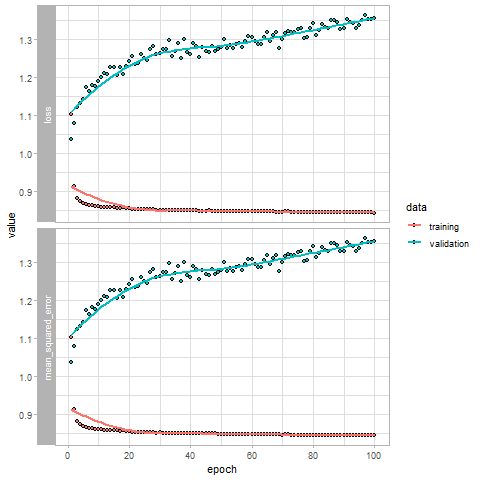

In [52]:
%%R
# 3 layers: baseline
use_session_with_seed(0, quiet = TRUE)
model_l3_base= keras_model_sequential() %>%
  layer_dense(units = round(ncol(train_x3)^(3/4)),
              activation = 'relu', 
              input_shape = ncol(train_x3), 
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = round(ncol(train_x3)^(2/4)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = round(ncol(train_x3)^(1/4)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = 1)

model_l3_base %>% compile(loss = 'mean_squared_error', 
                          optimizer = optimizer_adam(), 
                          metric = c('mean_squared_error'))
summary(model_l3_base)

fit_l3_base = model_l3_base %>%
  fit(train_x3, train_y3,
      epochs = 100, 
      batch_size = 200, 
      validation_data = list(val_x3, val_y3),
      verbose = 0)
plot(fit_l3_base) + theme_light()

In [53]:
%%R
pred_l3_base = predict(model_l3_base, test_x3, batch_size = 200, epochs = 100)
perf_l3_base = pred_l3_base %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l3_baseline = perf_l3_base %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l3_baseline

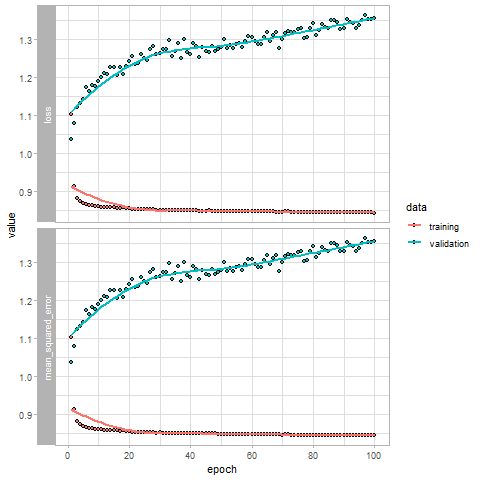

In [54]:
%%R
# 3 layers: adam + call back
use_session_with_seed(0, quiet = TRUE)
model_l3_adam = keras_model_sequential() %>%
  layer_dense(units = round(ncol(train_x3)^(3/4)),
              activation = 'relu', 
              input_shape = ncol(train_x3), 
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = round(ncol(train_x3)^(2/4)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = round(ncol(train_x3)^(1/4)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = 1)

model_l3_adam %>% compile(loss = 'mean_squared_error', 
                          optimizer = optimizer_adam(), 
                          metric = c('mean_squared_error'))
summary(model_l3_adam)

fit_l3_adam = model_l3_adam %>%
  fit(train_x3, train_y3,
      epochs = 100, 
      batch_size = 200, 
      validation_data = list(val_x3, val_y3),
      verbose = 0,
      call_backs = list(callback_early_stopping(monitor = "val_loss",
                                                min_delta = 0.001,
                                                patience = 5,
                                                verbose = 0)))
plot(fit_l3_adam) +theme_light()

In [55]:
%%R
pred_l3_adam = predict(model_l3_adam, test_x3, batch_size = 200, epochs = 100)
perf_l3_adam = pred_l3_adam %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l3_adam = perf_l3_adam %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l3_adam

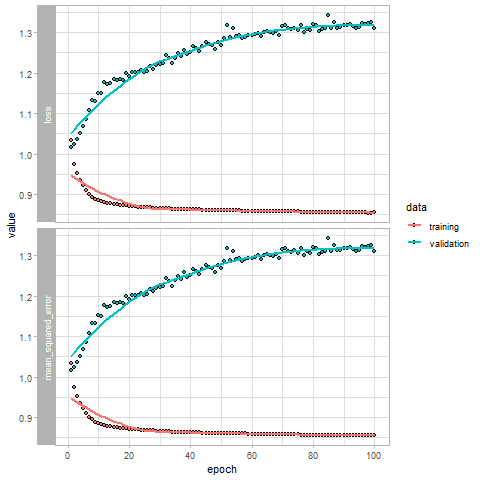

In [56]:
%%R
# 3 layers: sgd + call_back
use_session_with_seed(0, quiet = TRUE)
model_l3_sgd = keras_model_sequential() %>%
  layer_dense(units = round(ncol(train_x3)^(3/4)),
              activation = 'relu', 
              input_shape = ncol(train_x3), 
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = round(ncol(train_x3)^(2/4)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = round(ncol(train_x3)^(1/4)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = 1)

model_l3_sgd %>% compile(loss = 'mean_squared_error', 
                          optimizer = optimizer_sgd(), 
                          metric = c('mean_squared_error'))
summary(model_l3_sgd)

fit_l3_sgd = model_l3_sgd %>%
  fit(train_x3, train_y3,
      epochs = 100, 
      batch_size = 200, 
      validation_data = list(val_x3, val_y3),
      verbose = 0,
      call_backs = list(callback_early_stopping(monitor = "val_loss",
                                                min_delta = 0.001,
                                                patience = 5,
                                                verbose = 0)))
plot(fit_l3_sgd) + theme_light()

In [57]:
%%R
pred_l3_sgd = predict(model_l3_sgd, test_x3, batch_size = 200, epochs = 100)
perf_l3_sgd = pred_l3_sgd %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l3_sgd = perf_l3_sgd %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l3_sgd

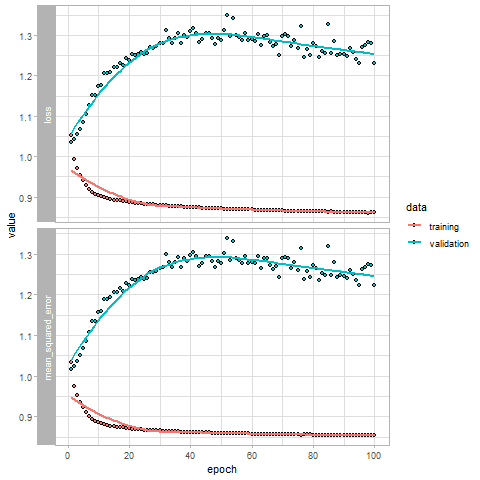

In [58]:
%%R
# 3 layers: sgd + call_back + L2
use_session_with_seed(0, quiet = TRUE)
model_l3_sgd_L2 = keras_model_sequential() %>%
  layer_dense(units = round(ncol(train_x3)^(3/4)),
              activation = 'relu', 
              input_shape = ncol(train_x3), 
              kernel_regularizer = regularizer_l2(l = 0.001),
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = round(ncol(train_x3)^(2/4)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = round(ncol(train_x3)^(1/4)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = 1)

model_l3_sgd_L2 %>% compile(loss = 'mean_squared_error', 
                          optimizer = optimizer_sgd(), 
                          metric = c('mean_squared_error'))
summary(model_l3_sgd_L2)

fit_l3_sgd_L2 = model_l3_sgd_L2 %>%
  fit(train_x3, train_y3,
      epochs = 100, 
      batch_size = 200, 
      validation_data = list(val_x3, val_y3),
      verbose = 0,
      call_backs = list(callback_early_stopping(monitor = "val_loss",
                                                min_delta = 0.001,
                                                patience = 5,
                                                verbose = 0)))
plot(fit_l3_sgd_L2) + theme_light()

In [59]:
%%R
pred_l3_sgd_L2 = predict(model_l3_sgd_L2, test_x3, batch_size = 200, epochs = 100)
perf_l3_sgd_L2 = pred_l3_sgd_L2 %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l3_sgd_L2 = perf_l3_sgd_L2 %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l3_sgd_L2

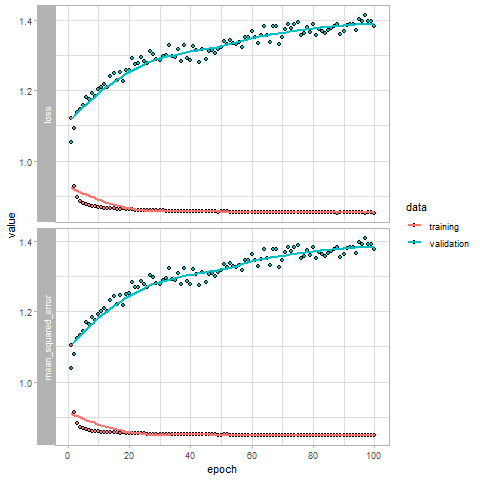

In [60]:
%%R
# 3 layers: adam + call_back + L2
use_session_with_seed(0, quiet = TRUE)
model_l3_adam_L2 = keras_model_sequential() %>%
  layer_dense(units = round(ncol(train_x3)^(3/4)),
              activation = 'relu', 
              input_shape = ncol(train_x3), 
              kernel_regularizer = regularizer_l2(l = 0.001),
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = round(ncol(train_x3)^(2/4)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = round(ncol(train_x3)^(1/4)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = 1)

model_l3_adam_L2 %>% compile(loss = 'mean_squared_error', 
                             optimizer = optimizer_adam(), 
                             metric = c('mean_squared_error'))
summary(model_l3_adam_L2)

fit_l3_adam_L2 = model_l3_adam_L2 %>%
  fit(train_x3, train_y3,
      epochs = 100, 
      batch_size = 200, 
      validation_data = list(val_x3, val_y3),
      verbose = 0,
      call_backs = list(callback_early_stopping(monitor = "val_loss",
                                                min_delta = 0.001,
                                                patience = 5,
                                                verbose = 0)))
plot(fit_l3_adam_L2) + theme_light()

In [61]:
%%R
pred_l3_adam_L2 = predict(model_l3_adam_L2, test_x3, batch_size = 200, epochs = 100)
perf_l3_adam_L2 = pred_l3_adam_L2 %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l3_adam_L2 = perf_l3_adam_L2 %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l3_adam_L2

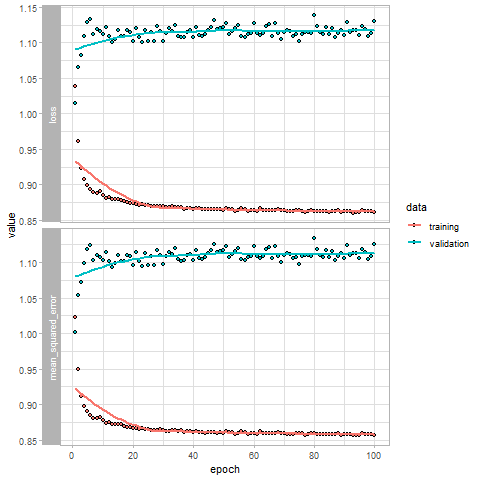

In [62]:
%%R
# 3 layers: adam + call_back + L2 + dropout
use_session_with_seed(0, quiet = TRUE)
model_l3_adam_L2_drop = keras_model_sequential() %>%
  layer_dense(units = round(ncol(train_x3)^(3/4)),
              activation = 'relu', 
              input_shape = ncol(train_x3), 
              kernel_regularizer = regularizer_l2(l = 0.001),
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dropout(rate = 0.1) %>%
  layer_dense(units = round(ncol(train_x3)^(2/4)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = round(ncol(train_x3)^(1/4)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = 1)

model_l3_adam_L2_drop %>% compile(loss = 'mean_squared_error', 
                             optimizer = optimizer_adam(), 
                             metric = c('mean_squared_error'))
summary(model_l3_adam_L2_drop)

fit_l3_adam_L2_drop = model_l3_adam_L2_drop %>%
  fit(train_x3, train_y3,
      epochs = 100, 
      batch_size = 200, 
      validation_data = list(val_x3, val_y3),
      verbose = 0,
      call_backs = list(callback_early_stopping(monitor = "val_loss",
                                                min_delta = 0.001,
                                                patience = 5,
                                                verbose = 0)))
plot(fit_l3_adam_L2_drop) + theme_light()

In [63]:
%%R
pred_l3_adam_L2_drop = predict(model_l3_adam_L2_drop, test_x3, batch_size = 200, epochs = 100)
perf_l3_adam_L2_drop = pred_l3_adam_L2_drop %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l3_adam_L2_drop = perf_l3_adam_L2_drop %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l3_adam_L2_drop

C:\Users\timzh\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.184506). Check your callbacks.
  % delta_t_median)


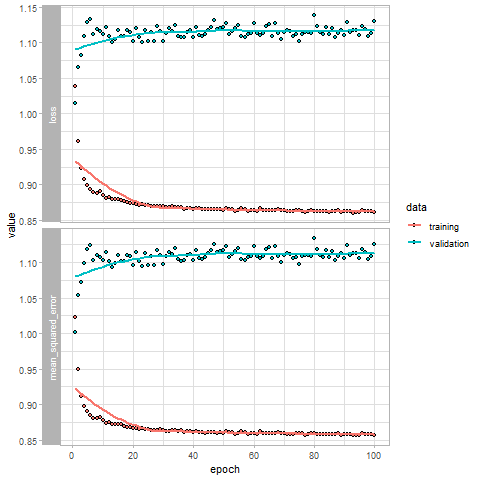

In [64]:
%%R
# 3 layers: sgd + call_back + L2 + dropout
use_session_with_seed(0, quiet = TRUE)
model_l3_sgd_L2_drop = keras_model_sequential() %>%
  layer_dense(units = round(ncol(train_x3)^(3/4)),
              activation = 'relu', 
              input_shape = ncol(train_x3), 
              kernel_regularizer = regularizer_l2(l = 0.001),
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dropout(rate = 0.1) %>%
  layer_dense(units = round(ncol(train_x3)^(2/4)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = round(ncol(train_x3)^(1/4)), 
              activation = 'tanh',
              bias_initializer = initializer_random_normal(mean = 0, stddev =  1)) %>%
  layer_dense(units = 1)

model_l3_sgd_L2_drop %>% compile(loss = 'mean_squared_error', 
                                  optimizer = optimizer_adam(), 
                                  metric = c('mean_squared_error'))
summary(model_l3_sgd_L2_drop)

fit_l3_sgd_L2_drop = model_l3_sgd_L2_drop %>%
  fit(train_x3, train_y3,
      epochs = 100, 
      batch_size = 200, 
      validation_data = list(val_x3, val_y3),
      verbose = 0,
      call_backs = list(callback_early_stopping(monitor = "val_loss",
                                                min_delta = 0.001,
                                                patience = 5,
                                                verbose = 0)))
plot(fit_l3_sgd_L2_drop) + theme_light()

In [65]:
%%R
pred_l3_sgd_L2_drop = predict(model_l3_sgd_L2_drop, test_x3, batch_size = 200, epochs = 100)
perf_l3_sgd_L2_drop = pred_l3_sgd_L2_drop %>%
  as_tibble() %>%
  mutate(truth = as.numeric(test_y3)) %>%
  rename(pred_rtn = V1)
r2_l3_sgd_L2_drop = perf_l3_sgd_L2_drop %>%
  summarize(R_2 = 1 -  mean((truth - pred_rtn)^2)/mean((truth-mean(truth))^2))
r2_l3_sgd_L2_drop

# Improvements

### Month Forward-Chaining: Nested Cross-Validation

Since we have a time-series, we have to cross-validate in a different manner to preserve chronology. A method of doing so comes from nested cross-validation techniques.

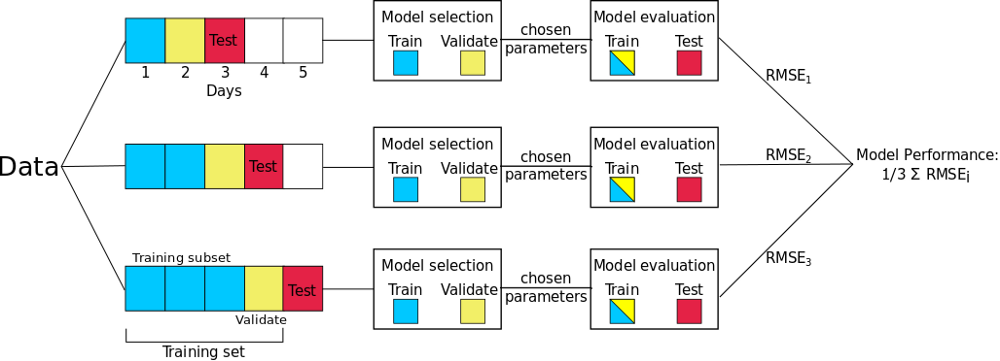

In our dataset, we have 183853 different observations, with a reasonable distribution of dates (`df['datadate'].value_counts()` and `df['datadate'].hist()` both indicate this), and so this provides an alternative way of reducing the variance.

Firstly, we split the observations into fifths. Then we assign the first 20% as the training set, and the next 20% as the validation, and the subsequent 20% as the test set. Using these sets, we train and validate the models, as normal, and then evaluate them on the final test set. Then we capture more of the data, assigning the first 40% to the training set, the next 20% to the validation set, and the subsequent 20% to the test set, and repeat the training and evaluation. Finally, we assign the first 40% to the training set, the next 40% to the test set, and the final 20% to the test set.

In this case we have preserved the size of the test set. We can also shrink these proportions to allow for more than 3 splits, for example, 10/10/10 then 20/20/10, then 30/30/10, etc.

This would help to reduce the variance of our model and better generalise our model to improve its predictive power.

### Further hyperparameter tuning

Given the complexity of the optimisation and regularisation procedures, we would have liked to train different iterations of these over a greater range. We were only able to trade a few different values for the hyperparameters but still demonstrated that some clearly improved the out of sample performance.

The goal was to perfect the learning curves to be able to diagnose the problems in our model (as stated at the beginning of section 2, in our procedure following the Deep Learning book's recommendation), but were only able to perform a few changes to the curve before we had to progress to other tasks. Optimisation and regularisation can take up a large amount of time, but it was important for us to produce some results that can be analysed from an economic point of view.

### Imposing constraints

By imposing constraints on the return (such as, it must be positive), we might have an easier time being able to predict these stocks, as a lot of the noise from the data would be removed. However, neural networks exceed in picking up noise and can fit it quite well, so this improvement would not be as groundbreaking as if we had a less flexible algorithm.

### Simulating a portfolio

We could use the neural network model to build a portfolio strategy, every month buying the top 10% of stocks with the highest predicted monthly return, and selling the bottom 10%. This would allow us to calculate how much wealth our model can generate, which is of practical use.